In [1]:
import pandas as pd
from datetime import datetime


In [2]:
file_path = "Resultados_Saber_11_Original.csv"

# Leer el archivo CSV (utiliza chunks para manejar grandes volúmenes de datos)
chunksize = 100000  # Tamaño de los chunks
data_iter = pd.read_csv(file_path, chunksize=chunksize, low_memory=False)

# Concatenar los chunks en un solo DataFrame
df_Saber11 = pd.concat(data_iter)

In [3]:
# Lectura archivo CSV Pruebas Saber Pro
# Ruta del archivo CSV
file_path = "Resultados__nicos_Saber_Pro.csv"

# Leer el archivo CSV (utiliza chunks para manejar grandes volúmenes de datos)
chunksize = 100000  # Tamaño de los chunks
data_iter = pd.read_csv(file_path, chunksize=chunksize, low_memory=False)

# Concatenar los chunks en un solo DataFrame
df_SaberPro = pd.concat(data_iter)

In [4]:
df_Saber11.columns

Index(['PERIODO', 'ESTU_TIPODOCUMENTO', 'ESTU_CONSECUTIVO',
       'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO',
       'COLE_CARACTER', 'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE',
       'COLE_COD_DEPTO_UBICACION', 'COLE_COD_MCPIO_UBICACION',
       'COLE_CODIGO_ICFES', 'COLE_DEPTO_UBICACION', 'COLE_GENERO',
       'COLE_JORNADA', 'COLE_MCPIO_UBICACION', 'COLE_NATURALEZA',
       'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE',
       'COLE_SEDE_PRINCIPAL', 'ESTU_COD_DEPTO_PRESENTACION',
       'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_RESIDE_DEPTO',
       'ESTU_COD_RESIDE_MCPIO', 'ESTU_DEPTO_PRESENTACION', 'ESTU_DEPTO_RESIDE',
       'ESTU_ESTADOINVESTIGACION', 'ESTU_ESTUDIANTE', 'ESTU_FECHANACIMIENTO',
       'ESTU_GENERO', 'ESTU_MCPIO_PRESENTACION', 'ESTU_MCPIO_RESIDE',
       'ESTU_NACIONALIDAD', 'ESTU_PAIS_RESIDE', 'ESTU_PRIVADO_LIBERTAD',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSO

In [5]:
df_SaberPro.columns

Index(['PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_TIPODOCUMENTO', 'ESTU_PAIS_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_MCPIO_RESIDE', 'ESTU_CODDANE_COLE_TERMINO',
       'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_COD_DEPTO_PRESENTACION',
       'INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION',
       'INST_CARACTER_ACADEMICO', 'ESTU_NUCLEO_PREGRADO',
       'ESTU_INST_DEPARTAMENTO', 'ESTU_INST_CODMUNICIPIO',
       'ESTU_INST_MUNICIPIO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO',
       'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_METODO_PRGM',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_DEPTO_PRESENTACION',
       'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION',
       'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO',
       'ESTU_HORASSEMANATRABAJA', 'ESTU_SNIES_PRGMACADEMICO',
       'ESTU_PRIVADO_LIBERTAD', 'ESTU_NACIONALIDAD', 'ESTU_ESTUDIANTE',
       'ESTU_GENERO',

In [6]:
# Saber11: Extraer el año de la columna 'PERIODO' (los primeros 4 dígitos) y crear una nueva columna 'AÑO'
df_Saber11['AÑO'] = df_Saber11['PERIODO'].astype(str).str[:4]

# Convertir la nueva columna 'AÑO' a formato numérico
df_Saber11['AÑO'] = pd.to_numeric(df_Saber11['AÑO'])

# Ver cuántos registros hay de cada año
conteo_por_año = df_Saber11['AÑO'].value_counts().sort_index()

# Mostrar el resultado
print(conteo_por_año)

2010    103152
2011     99198
2012    104876
2013     89494
2014     87895
2015     87978
2016     86752
2017     86439
2018      4836
2019    170756
2020      2477
2021      2441
2022      1683
Name: AÑO, dtype: int64


In [7]:
# SaberPro: Extraer el año de la columna 'PERIODO' (los primeros 4 dígitos) y crear una nueva columna 'AÑO'
df_SaberPro['AÑO'] = df_SaberPro['PERIODO'].astype(str).str[:4]

# Convertir la nueva columna 'AÑO' a formato numérico
df_SaberPro['AÑO'] = pd.to_numeric(df_SaberPro['AÑO'])

# Ver cuántos registros hay de cada año
conteo_por_año_pro = df_SaberPro['AÑO'].value_counts().sort_index()

# Mostrar el resultado
print(conteo_por_año_pro)

2018    172341
2019    190563
2020    180241
2021    180963
2022      5134
Name: AÑO, dtype: int64


In [8]:
df_SaberPro.shape

(729242, 58)

In [9]:
df_Saber11.shape

(927977, 52)

In [10]:
# Eliminar la columna 'PERIODO' del DataFrame Saber 11

df_Saber11 = df_Saber11.drop('PERIODO', axis=1)

# Eliminar la columna 'PERIODO' del DataFrame Saber Pro
df_SaberPro = df_SaberPro.drop('PERIODO', axis=1)

In [11]:
# Respecto a la fecha de nacimiento, es determinante para saber la edad en la cual tomó el examen,
# más no es necesaria la fecha de nacimiento una vez hecho el cálculo.
# Ahora generamos la edad a partir de la fecha de nacimiento y eliminamos la columna de fecha
# Previamente se hace una limpieza de datos y conversión de fecha a un solo formato

# El proceso que estamos siguiendo es:
# Filtrar el rango de años: En la función convertir_a_fecha_estandar, el código revisa si el año de nacimiento
# está dentro del rango de 1980 a 2010, que es razonable para estudiantes que toman el examen Saber 11 (esto supone que
# vamos a analizar estudiante que al momento de tomar el examen, por ejemplo en 2010, tienen máximo 40 años). Consideramos
# que para efectos del proyecto es un mecanismo práctico y válido.
# Manejo de valores inválidos: Si una fecha no está en el formato correcto o el año no es válido,
# el valor se marca como None y no se calcula la edad para ese registro.
# Cálculo de la edad: Calculamos la edad solo para las fechas que pasaron la validación.

# Paso 1: Función para convertir las fechas y manejar los casos incorrectos
def convertir_a_fecha_estandar(fecha):
    try:
        # Convertir a formato datetime usando día/mes/año
        fecha_convertida = datetime.strptime(fecha, '%d/%m/%Y')
        # Filtrar por un rango de años razonable
        if 1980 <= fecha_convertida.year <= 2010:
            return fecha_convertida
        else:
            return None  # Si el año no está en el rango, devolver None
    except (ValueError, TypeError):
        return None  # Devolver None si la fecha no es válida

# Aplicar la conversión a la columna de fechas en Saber 11
df_Saber11['FECHA_NACIMIENTO_LIMPIA'] = df_Saber11['ESTU_FECHANACIMIENTO'].apply(convertir_a_fecha_estandar)

# Paso 2: Calcular la edad en el momento del examen
def calcular_edad_en_examen(examen_year, fecha_nacimiento):
    if pd.notna(fecha_nacimiento):
        return examen_year - fecha_nacimiento.year
    else:
        return None

df_Saber11['EDAD_EXAMEN'] = df_Saber11.apply(lambda row: calcular_edad_en_examen(row['AÑO'], row['FECHA_NACIMIENTO_LIMPIA']), axis=1)

# Paso 3: Filtrar los que tengan 40 años o menos al momento de presentar el examen
df_Saber11 = df_Saber11[df_Saber11['EDAD_EXAMEN'] <= 40]

# Paso 4: Eliminar las columnas innecesarias
df_Saber11.drop(columns=['ESTU_FECHANACIMIENTO', 'FECHA_NACIMIENTO_LIMPIA'], inplace=True)

# Verificar el resultado
print(df_Saber11[['AÑO', 'EDAD_EXAMEN']].head())

    AÑO  EDAD_EXAMEN
0  2013         19.0
1  2019         16.0
2  2019         16.0
3  2012         16.0
4  2013         16.0


In [12]:
# Aplicar la conversión a la columna de fechas en Saber Pro
df_SaberPro['FECHA_NACIMIENTO_LIMPIA'] = df_SaberPro['ESTU_FECHANACIMIENTO'].apply(convertir_a_fecha_estandar)

# Calcular la edad en el momento del examen para Saber Pro
df_SaberPro['EDAD_EXAMEN'] = df_SaberPro.apply(lambda row: calcular_edad_en_examen(row['AÑO'], row['FECHA_NACIMIENTO_LIMPIA']), axis=1)

# Filtrar los que tengan 40 años o menos al momento de presentar el examen
df_SaberPro = df_SaberPro[df_SaberPro['EDAD_EXAMEN'] <= 40]

# Eliminar las columnas innecesarias
df_SaberPro.drop(columns=['ESTU_FECHANACIMIENTO', 'FECHA_NACIMIENTO_LIMPIA'], inplace=True)

# Verificar el resultado
print(df_SaberPro[['AÑO', 'EDAD_EXAMEN']].head())

    AÑO  EDAD_EXAMEN
0  2018         21.0
1  2018         23.0
2  2018         24.0
3  2018         21.0
4  2018         31.0


In [13]:
df_SaberPro.columns

Index(['ESTU_CONSECUTIVO', 'ESTU_TIPODOCUMENTO', 'ESTU_PAIS_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_MCPIO_RESIDE', 'ESTU_CODDANE_COLE_TERMINO',
       'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_COD_DEPTO_PRESENTACION',
       'INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION',
       'INST_CARACTER_ACADEMICO', 'ESTU_NUCLEO_PREGRADO',
       'ESTU_INST_DEPARTAMENTO', 'ESTU_INST_CODMUNICIPIO',
       'ESTU_INST_MUNICIPIO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO',
       'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_METODO_PRGM',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_DEPTO_PRESENTACION',
       'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION',
       'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO',
       'ESTU_HORASSEMANATRABAJA', 'ESTU_SNIES_PRGMACADEMICO',
       'ESTU_PRIVADO_LIBERTAD', 'ESTU_NACIONALIDAD', 'ESTU_ESTUDIANTE',
       'ESTU_GENERO', 'ESTU_COLE

In [14]:
df_Saber11.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_CONSECUTIVO', 'COLE_AREA_UBICACION',
       'COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_CARACTER',
       'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE',
       'COLE_COD_DEPTO_UBICACION', 'COLE_COD_MCPIO_UBICACION',
       'COLE_CODIGO_ICFES', 'COLE_DEPTO_UBICACION', 'COLE_GENERO',
       'COLE_JORNADA', 'COLE_MCPIO_UBICACION', 'COLE_NATURALEZA',
       'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE',
       'COLE_SEDE_PRINCIPAL', 'ESTU_COD_DEPTO_PRESENTACION',
       'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_RESIDE_DEPTO',
       'ESTU_COD_RESIDE_MCPIO', 'ESTU_DEPTO_PRESENTACION', 'ESTU_DEPTO_RESIDE',
       'ESTU_ESTADOINVESTIGACION', 'ESTU_ESTUDIANTE', 'ESTU_GENERO',
       'ESTU_MCPIO_PRESENTACION', 'ESTU_MCPIO_RESIDE', 'ESTU_NACIONALIDAD',
       'ESTU_PAIS_RESIDE', 'ESTU_PRIVADO_LIBERTAD', 'FAMI_CUARTOSHOGAR',
       'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_PERSONASHOGAR', 'FAMI_TIENEAUTOMOVIL', '

In [15]:
Columnas_a_eliminar_saber_11 = ['ESTU_CONSECUTIVO','ESTU_TIPODOCUMENTO','ESTU_ESTADOINVESTIGACION']
Columnas_a_eliminar_saber_pro = ['ESTU_CONSECUTIVO','ESTU_TIPODOCUMENTO','ESTU_ESTADOINVESTIGACION','INST_NOMBRE_INSTITUCION','ESTU_TIPODOCUMENTOSB11']
df_Saber11.drop(columns=Columnas_a_eliminar_saber_11, inplace=True)
df_SaberPro.drop(columns=Columnas_a_eliminar_saber_pro, inplace=True)


In [16]:
df_Saber11.shape

(910352, 48)

In [17]:
df_SaberPro.shape

(691079, 52)

In [18]:
print(df_Saber11.isnull().sum())

COLE_AREA_UBICACION                 373
COLE_BILINGUE                    108477
COLE_CALENDARIO                     222
COLE_CARACTER                      9890
COLE_COD_DANE_ESTABLECIMIENTO       437
COLE_COD_DANE_SEDE                   10
COLE_COD_DEPTO_UBICACION              0
COLE_COD_MCPIO_UBICACION              0
COLE_CODIGO_ICFES                  3517
COLE_DEPTO_UBICACION                  0
COLE_GENERO                           0
COLE_JORNADA                          0
COLE_MCPIO_UBICACION                  0
COLE_NATURALEZA                       0
COLE_NOMBRE_ESTABLECIMIENTO           0
COLE_NOMBRE_SEDE                      0
COLE_SEDE_PRINCIPAL                   0
ESTU_COD_DEPTO_PRESENTACION          14
ESTU_COD_MCPIO_PRESENTACION          14
ESTU_COD_RESIDE_DEPTO              5943
ESTU_COD_RESIDE_MCPIO              5943
ESTU_DEPTO_PRESENTACION              14
ESTU_DEPTO_RESIDE                  5943
ESTU_ESTUDIANTE                       0
ESTU_GENERO                         475


In [19]:
print(df_SaberPro.isnull().sum())

ESTU_PAIS_RESIDE                       0
ESTU_COD_RESIDE_DEPTO               1772
ESTU_DEPTO_RESIDE                   1772
ESTU_COD_RESIDE_MCPIO               1772
ESTU_MCPIO_RESIDE                   1772
ESTU_CODDANE_COLE_TERMINO         222455
ESTU_COD_COLE_MCPIO_TERMINO       222455
ESTU_COD_DEPTO_PRESENTACION           66
INST_COD_INSTITUCION                   0
INST_CARACTER_ACADEMICO                0
ESTU_NUCLEO_PREGRADO                   0
ESTU_INST_DEPARTAMENTO                 0
ESTU_INST_CODMUNICIPIO                 0
ESTU_INST_MUNICIPIO                    0
ESTU_PRGM_ACADEMICO                    0
ESTU_PRGM_DEPARTAMENTO                 0
ESTU_PRGM_CODMUNICIPIO                 0
ESTU_PRGM_MUNICIPIO                    0
ESTU_NIVEL_PRGM_ACADEMICO              0
ESTU_METODO_PRGM                       0
ESTU_VALORMATRICULAUNIVERSIDAD      6205
ESTU_DEPTO_PRESENTACION               66
ESTU_COD_MCPIO_PRESENTACION           66
ESTU_MCPIO_PRESENTACION               66
ESTU_PAGOMATRICU

In [20]:
# Paso 1: Seleccionar las columnas categóricas (no numéricas)
# Esto ayudará a identificar columnas de tipo "object" que suelen ser categóricas
columnas_categoricas = df_Saber11.select_dtypes(include=['object']).columns

# Paso 2: Mostrar los valores únicos de cada columna categórica
# Este bucle recorre cada columna categórica y muestra sus valores únicos
for columna in columnas_categoricas:
    print(f"Valores únicos de la columna '{columna}':")
    print(df_Saber11[columna].unique())
    print("\n" + "-"*50 + "\n") 

Valores únicos de la columna 'COLE_AREA_UBICACION':
['URBANO' 'RURAL' nan]

--------------------------------------------------

Valores únicos de la columna 'COLE_BILINGUE':
['N' nan 'S']

--------------------------------------------------

Valores únicos de la columna 'COLE_CALENDARIO':
['B' 'A' 'OTRO' nan]

--------------------------------------------------

Valores únicos de la columna 'COLE_CARACTER':
['ACADÉMICO' 'TÉCNICO/ACADÉMICO' 'TÉCNICO' 'NO APLICA' nan]

--------------------------------------------------

Valores únicos de la columna 'COLE_DEPTO_UBICACION':
['BOGOTA' 'HUILA' 'QUINDIO' 'CAUCA' 'VALLE' 'TOLIMA' 'ANTIOQUIA'
 'PUTUMAYO' 'SANTANDER' 'ATLANTICO' 'SUCRE' 'BOYACA' 'BOLIVAR' 'CESAR'
 'BOGOTÁ' 'MAGDALENA' 'NORTE SANTANDER' 'NARIÑO' 'CUNDINAMARCA' 'CASANARE'
 'META' 'CALDAS' 'CHOCO' 'CORDOBA' 'RISARALDA' 'VICHADA' 'CAQUETA'
 'LA GUAJIRA' 'AMAZONAS' 'ARAUCA' 'GUAVIARE' 'VAUPES' 'SAN ANDRES'
 'GUAINIA']

--------------------------------------------------

Valores únicos 

Las siguientes columnas: FAMI_EDUCACIONMADRE (nulos 205546), FAMI_EDUCACIONPADRE (nulos 205201), FAMI_ESTRATOVIVIENDA (nulos 210618) son muy relevantes para el proyecto, por los estudios que existen en relación a su efecto en la educación. Por lo anterior, se van a eliminar los valores nulos de estas columnas. 

In [21]:
# Eliminar los registros con valores nulos en 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE' y 'FAMI_ESTRATOVIVIENDA'
df_Saber11.dropna(subset=['FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA'], inplace=True)

# Verificar el número de registros después de eliminar los nulos
num_registros_saber11 = len(df_Saber11)
print(f"Número de registros en Saber11 después de eliminar nulos: {num_registros_saber11}")

Número de registros en Saber11 después de eliminar nulos: 881781


In [23]:
df_SaberPro.dropna(subset=['FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA'], inplace=True)
num_registros_SaberPro = len(df_SaberPro)
print(f"Número de registros en Saber11 después de eliminar nulos: {num_registros_SaberPro}")

Número de registros en Saber11 después de eliminar nulos: 658102


In [25]:
# Se van a eliminar los valores nulos de las columnas que tienen pocos registros de nulos proporcionalmente.

# Lista de columnas con valores nulos a eliminar en Saber11
columnas_nulas_a_eliminar = [
    'COLE_AREA_UBICACION', 'COLE_CALENDARIO', 'COLE_COD_DANE_ESTABLECIMIENTO',
    'COLE_COD_DANE_SEDE', 'COLE_COD_DEPTO_UBICACION', 'COLE_COD_MCPIO_UBICACION',
    'COLE_DEPTO_UBICACION', 'COLE_GENERO', 'COLE_JORNADA', 'COLE_MCPIO_UBICACION',
    'COLE_NATURALEZA', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE',
    'COLE_SEDE_PRINCIPAL', 'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_COD_MCPIO_PRESENTACION',
    'ESTU_DEPTO_PRESENTACION', 'ESTU_GENERO', 'ESTU_MCPIO_PRESENTACION'
]

# Eliminar registros con valores nulos en las columnas especificadas
df_Saber11.dropna(subset=columnas_nulas_a_eliminar, inplace=True)

# Verificar el número total de registros después de la eliminación
num_registros_saber11 = len(df_Saber11)
print(f"Número de registros en Saber11 después de eliminar nulos: {num_registros_saber11}")

Número de registros en Saber11 después de eliminar nulos: 880713


Hay dos variables que tienen un número significativo de nulos: FAMI_TIENECOMPUTADOR 146573 FAMI_TIENEINTERNET 184136 El manejo más adecuado para estas dos columnas es asignarles el valor de 'Si' o de 'No', de manera aleatoria en una proporción igual a los datos que tengan ese estrato en los estudiantes que tienen un valor válido ('Si', 'No').

In [28]:
import numpy as np
# Función para imputar valores nulos según la proporción en un grupo específico
def imputar_por_proporcion(df, columna_imputar, columna_grupo):
    for grupo, sub_df in df.groupby(columna_grupo):
        # Calcular las proporciones de 'Si' y 'No' para el grupo actual
        proporciones = sub_df[columna_imputar].value_counts(normalize=True)
        prob_si = proporciones.get('Si', 0)
        prob_no = proporciones.get('No', 0)
        
        # Imputar valores nulos en la columna de interés según las proporciones del grupo
        mask = (df[columna_grupo] == grupo) & (df[columna_imputar].isna())
        df.loc[mask, columna_imputar] = np.random.choice(
            ['Si', 'No'],
            size=mask.sum(),
            p=[prob_si, prob_no]
        )

# Imputar FAMI_TIENECOMPUTADOR según FAMI_ESTRATOVIVIENDA
imputar_por_proporcion(df_Saber11, 'FAMI_TIENECOMPUTADOR', 'FAMI_ESTRATOVIVIENDA')

# Imputar FAMI_TIENEINTERNET según FAMI_ESTRATOVIVIENDA
imputar_por_proporcion(df_Saber11, 'FAMI_TIENEINTERNET', 'FAMI_ESTRATOVIVIENDA')

# Verificar los resultados
print(df_Saber11[['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET']].head())

  FAMI_ESTRATOVIVIENDA FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET
0            Estrato 6                   Si                 Si
1            Estrato 2                   Si                 Si
2            Estrato 2                   Si                 Si
3            Estrato 1                   Si                 Si
4            Estrato 2                   Si                 Si


In [30]:
imputar_por_proporcion(df_SaberPro, 'FAMI_TIENECOMPUTADOR', 'FAMI_ESTRATOVIVIENDA')

# Imputar FAMI_TIENEINTERNET según FAMI_ESTRATOVIVIENDA
imputar_por_proporcion(df_SaberPro, 'FAMI_TIENEINTERNET', 'FAMI_ESTRATOVIVIENDA')
print(df_SaberPro[['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET']].head())

  FAMI_ESTRATOVIVIENDA FAMI_TIENECOMPUTADOR FAMI_TIENEINTERNET
0            Estrato 2                   Si                 Si
1            Estrato 2                   Si                 Si
2            Estrato 2                   Si                 Si
3            Estrato 2                   Si                 Si
4            Estrato 3                   Si                 Si


In [32]:
imputar_por_proporcion(df_Saber11, 'FAMI_TIENEAUTOMOVIL', 'FAMI_ESTRATOVIVIENDA')
imputar_por_proporcion(df_SaberPro, 'FAMI_TIENEAUTOMOVIL', 'FAMI_ESTRATOVIVIENDA')
imputar_por_proporcion(df_Saber11, 'FAMI_TIENELAVADORA', 'FAMI_ESTRATOVIVIENDA')
imputar_por_proporcion(df_SaberPro, 'FAMI_TIENELAVADORA', 'FAMI_ESTRATOVIVIENDA')

In [33]:
# Filtrar los registros con puntajes nulos en todas las materias y en el puntaje global
df_nulos_puntajes = df_Saber11[
    df_Saber11[['PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']].isnull().all(axis=1)
]

# 1. Verificar los años de los registros con puntajes nulos
conteo_por_año_nulos = df_nulos_puntajes['AÑO'].value_counts().sort_index()
print("Distribución de registros con puntajes nulos por año:")
print(conteo_por_año_nulos)

# 2. Examinar la ubicación geográfica de los registros nulos
# Contar por departamento de presentación
conteo_por_departamento = df_nulos_puntajes['ESTU_DEPTO_PRESENTACION'].value_counts()
print("\nDistribución de registros con puntajes nulos por departamento de presentación:")
print(conteo_por_departamento)

# Contar por municipio de presentación
conteo_por_municipio = df_nulos_puntajes['ESTU_MCPIO_PRESENTACION'].value_counts()
print("\nDistribución de registros con puntajes nulos por municipio de presentación:")
print(conteo_por_municipio)

# 3. Revisar otras características de los registros nulos
# Ver distribución por estrato socioeconómico
conteo_por_estrato = df_nulos_puntajes['FAMI_ESTRATOVIVIENDA'].value_counts(dropna=False)
print("\nDistribución de registros con puntajes nulos por estrato socioeconómico:")
print(conteo_por_estrato)

# Ver distribución por naturaleza del colegio (público, privado, etc.)
conteo_por_naturaleza = df_nulos_puntajes['COLE_NATURALEZA'].value_counts(dropna=False)
print("\nDistribución de registros con puntajes nulos por naturaleza del colegio:")
print(conteo_por_naturaleza)

# Ver distribución por área de ubicación del colegio (urbano, rural)
conteo_por_area_ubicacion = df_nulos_puntajes['COLE_AREA_UBICACION'].value_counts(dropna=False)
print("\nDistribución de registros con puntajes nulos por área de ubicación del colegio:")
print(conteo_por_area_ubicacion)

# 4. Comparar con registros completos
# Filtrar los registros con puntajes completos en todas las materias y en el puntaje global
df_completos_puntajes = df_Saber11[
    df_Saber11[['PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']].notnull().all(axis=1)
]

# Verificar distribución por año en registros completos
conteo_por_año_completos = df_completos_puntajes['AÑO'].value_counts().sort_index()
print("\nDistribución de registros con puntajes completos por año:")
print(conteo_por_año_completos)

# Verificar distribución por estrato socioeconómico en registros completos
conteo_por_estrato_completos = df_completos_puntajes['FAMI_ESTRATOVIVIENDA'].value_counts(dropna=False)
print("\nDistribución de registros con puntajes completos por estrato socioeconómico:")
print(conteo_por_estrato_completos)

# Verificar distribución por naturaleza del colegio en registros completos
conteo_por_naturaleza_completos = df_completos_puntajes['COLE_NATURALEZA'].value_counts(dropna=False)
print("\nDistribución de registros con puntajes completos por naturaleza del colegio:")
print(conteo_por_naturaleza_completos)

Distribución de registros con puntajes nulos por año:
2010    96718
2011    93397
2012    96779
2013    86993
2014     3778
Name: AÑO, dtype: int64

Distribución de registros con puntajes nulos por departamento de presentación:
BOGOTÁ             61324
ANTIOQUIA          59840
VALLE              36925
CUNDINAMARCA       23813
ATLANTICO          21206
SANTANDER          19005
BOLIVAR            14460
BOYACA             11856
NARIÑO             11792
CORDOBA            11764
TOLIMA             10622
NORTE SANTANDER     9873
HUILA               9392
MAGDALENA           8489
CAUCA               8031
CALDAS              7498
META                7395
CESAR               7131
RISARALDA           6673
SUCRE               6575
LA GUAJIRA          4285
QUINDIO             4177
CASANARE            3909
CAQUETA             2454
PUTUMAYO            2409
ARAUCA              2349
CHOCO               2333
GUAVIARE             586
SAN ANDRES           499
AMAZONAS             431
VICHADA              2

El principal hallazgo es que los registros con puntajes nulos están concentrados en los primeros años: Distribución de registros con puntajes nulos por año: 2010 628765 2011 611890 2012 628071 2013 566869 2014 23765 Por ello, dado que son variables imprescindibles para el modelo, eliminar estos registros es razonable y justificado, especialmente porque se concentran en los primeros años y representan una porción significativa de datos que, además, carecen de información esencial para el modelo. No eliminarlos va a influir en la calidad del modelo, dado que las variables de puntajes en diferentes áreas (como matemáticas, ciencias naturales, y lectura crítica) son cruciales para este modelo predictivo que está centrado en rendimiento académico.

La opción es que exista una focalización en datos recientes, los cuales reflejan mejor las condiciones actuales y la tendencia educativa en Colombia, lo que permite desarrollar un modelo con una aplicabilidad práctica más alta. Finalmente, el tamaño de la muestra sigue siendo razonable, y debería ser suficientemente grande para construir un modelo robusto y confiable.

In [34]:
# Paso 1: Eliminar registros con valores nulos en las columnas de puntajes
columnas_puntajes = ['PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']
df_Saber11 = df_Saber11.dropna(subset=columnas_puntajes)

# Paso 2: Mostrar el número total de registros después de la eliminación
total_registros = len(df_Saber11)
print(f"Número total de registros después de eliminar puntajes nulos: {total_registros}")

# Paso 3: Contar y mostrar el número de registros por año
registros_por_año = df_Saber11['AÑO'].value_counts().sort_index()
print("\nNúmero de registros por año después de la eliminación:")
print(registros_por_año)

Número total de registros después de eliminar puntajes nulos: 503048

Número de registros por año después de la eliminación:
2014     82008
2015     86114
2016     85382
2017     81362
2018      4489
2019    158466
2020      1623
2021      2082
2022      1522
Name: AÑO, dtype: int64


In [35]:
# Verificar columnas con valores nulos en df_Saber11
columnas_nulas = df_Saber11.isnull().sum()

# Filtrar y mostrar solo las columnas con valores nulos mayores a cero
columnas_nulas = columnas_nulas[columnas_nulas > 0]

# Mostrar las columnas con valores nulos y sus respectivos conteos
print("Columnas con valores nulos y sus conteos:")
print(columnas_nulas)

Columnas con valores nulos y sus conteos:
COLE_BILINGUE            68441
COLE_CARACTER             7268
ESTU_COD_RESIDE_DEPTO      157
ESTU_COD_RESIDE_MCPIO      157
ESTU_DEPTO_RESIDE          157
ESTU_MCPIO_RESIDE          157
FAMI_CUARTOSHOGAR         3358
FAMI_PERSONASHOGAR        3422
DESEMP_INGLES               15
PUNT_INGLES                 21
dtype: int64


In [36]:
# Con relación a los valores nulos que aún quedan, se va a llevar a cabo lo siguiente:

# Eliminar registros con nulos en 'ESTU_COD_RESIDE_DEPTO' y 'ESTU_COD_RESIDE_MCPIO' (pocos nulos)

df_Saber11 = df_Saber11.dropna(subset=['ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO','ESTU_DEPTO_RESIDE','ESTU_MCPIO_RESIDE'])

# Eliminar registros con nulos en 'DESEMP_INGLES' y 'PUNT_INGLES' (pocos nulos)
df_Saber11 = df_Saber11.dropna(subset=['DESEMP_INGLES', 'PUNT_INGLES'])

# Eliminar la columna 'COLE_CARACTER' . No se encuentra esta variable relevante.
df_Saber11.drop(columns=['COLE_CARACTER'], inplace=True)

# Imputar valores nulos en 'COLE_BILINGUE' con 'No especificado'. En este caso se coloca valor "No especificado", para no
# afectar el resultado, siendo una variable importante.
df_Saber11['COLE_BILINGUE'].fillna('No especificado', inplace=True)

# Verificar el resultado final
print("Número total de registros después de la limpieza:", len(df_Saber11))
print("\nNúmero de registros con valores nulos por columna después de la limpieza:")
print(df_Saber11.isna().sum())

Número total de registros después de la limpieza: 502870

Número de registros con valores nulos por columna después de la limpieza:
COLE_AREA_UBICACION                 0
COLE_BILINGUE                       0
COLE_CALENDARIO                     0
COLE_COD_DANE_ESTABLECIMIENTO       0
COLE_COD_DANE_SEDE                  0
COLE_COD_DEPTO_UBICACION            0
COLE_COD_MCPIO_UBICACION            0
COLE_CODIGO_ICFES                   0
COLE_DEPTO_UBICACION                0
COLE_GENERO                         0
COLE_JORNADA                        0
COLE_MCPIO_UBICACION                0
COLE_NATURALEZA                     0
COLE_NOMBRE_ESTABLECIMIENTO         0
COLE_NOMBRE_SEDE                    0
COLE_SEDE_PRINCIPAL                 0
ESTU_COD_DEPTO_PRESENTACION         0
ESTU_COD_MCPIO_PRESENTACION         0
ESTU_COD_RESIDE_DEPTO               0
ESTU_COD_RESIDE_MCPIO               0
ESTU_DEPTO_PRESENTACION             0
ESTU_DEPTO_RESIDE                   0
ESTU_ESTUDIANTE                 

In [37]:
# Para la columna 'FAMI_CUARTOSHOGAR' se hace primero una conversión al número de cuartos respectivo y luego se registra la
# mediana.
# Paso 1: Mapeo de valores de texto a números en 'FAMI_CUARTOSHOGAR'
mapeo_cuartos = {
    'Uno': 1, 'Dos': 2, 'Tres': 3, 'Cuatro': 4, 'Cinco': 5,
    'Seis': 6, 'Siete': 7, 'Ocho': 8, 'Nueve': 9,
    'Diez o más': 10, 'Seis o mas': 6  # Suponemos que 'Seis o mas' es equivalente a 6
}

# Reemplazar los valores de texto con sus valores numéricos
df_Saber11['FAMI_CUARTOSHOGAR'] = df_Saber11['FAMI_CUARTOSHOGAR'].map(mapeo_cuartos)

# Paso 2: Imputar valores nulos en 'FAMI_CUARTOSHOGAR' con la mediana
df_Saber11['FAMI_CUARTOSHOGAR'].fillna(df_Saber11['FAMI_CUARTOSHOGAR'].median(), inplace=True)

# Verificar el resultado de la imputación
print("Valores únicos en 'FAMI_CUARTOSHOGAR' después de la imputación:", df_Saber11['FAMI_CUARTOSHOGAR'].unique())

Valores únicos en 'FAMI_CUARTOSHOGAR' después de la imputación: [ 2.  4.  5.  3.  1.  6. 10.  8.  7.  9.]


In [38]:
# La última columna con nulos es FAMI_PERSONASHOGAR y se le hace la conversión a numérico y se registra la mediana.

# Paso 1: Mapeo de valores de texto a números en 'FAMI_PERSONASHOGAR'
mapeo_personas = {
    'Una': 1, '1 a 2': 2, 'Dos': 2, 'Tres': 3, '3 a 4': 4, 
    'Cuatro': 4, 'Cinco': 5, '5 a 6': 6, 'Seis': 6, 'Siete': 7, 
    '7 a 8': 8, 'Ocho': 8, 'Nueve': 9, '9 o más': 9, 'Diez': 10,
    'Once': 11, 'Doce o más': 12
}

# Reemplazar los valores de texto con sus valores numéricos
df_Saber11['FAMI_PERSONASHOGAR'] = df_Saber11['FAMI_PERSONASHOGAR'].map(mapeo_personas)

# Paso 2: Imputar valores nulos en 'FAMI_PERSONASHOGAR' con la mediana
df_Saber11['FAMI_PERSONASHOGAR'].fillna(df_Saber11['FAMI_PERSONASHOGAR'].median(), inplace=True)

# Verificar el resultado de la imputación
print("Valores únicos en 'FAMI_PERSONASHOGAR' después de la imputación:", df_Saber11['FAMI_PERSONASHOGAR'].unique())
print("Mediana de 'FAMI_PERSONASHOGAR':", df_Saber11['FAMI_PERSONASHOGAR'].median())

Valores únicos en 'FAMI_PERSONASHOGAR' después de la imputación: [ 2.  6.  5.  4.  7.  3.  8.  9. 12. 11. 10.  1.]
Mediana de 'FAMI_PERSONASHOGAR': 4.0


In [40]:
print(df_Saber11.isnull().sum())

COLE_AREA_UBICACION              0
COLE_BILINGUE                    0
COLE_CALENDARIO                  0
COLE_COD_DANE_ESTABLECIMIENTO    0
COLE_COD_DANE_SEDE               0
COLE_COD_DEPTO_UBICACION         0
COLE_COD_MCPIO_UBICACION         0
COLE_CODIGO_ICFES                0
COLE_DEPTO_UBICACION             0
COLE_GENERO                      0
COLE_JORNADA                     0
COLE_MCPIO_UBICACION             0
COLE_NATURALEZA                  0
COLE_NOMBRE_ESTABLECIMIENTO      0
COLE_NOMBRE_SEDE                 0
COLE_SEDE_PRINCIPAL              0
ESTU_COD_DEPTO_PRESENTACION      0
ESTU_COD_MCPIO_PRESENTACION      0
ESTU_COD_RESIDE_DEPTO            0
ESTU_COD_RESIDE_MCPIO            0
ESTU_DEPTO_PRESENTACION          0
ESTU_DEPTO_RESIDE                0
ESTU_ESTUDIANTE                  0
ESTU_GENERO                      0
ESTU_MCPIO_PRESENTACION          0
ESTU_MCPIO_RESIDE                0
ESTU_NACIONALIDAD                0
ESTU_PAIS_RESIDE                 0
ESTU_PRIVADO_LIBERTA

In [41]:
# Eliminar registros con valores nulos en las columnas específicas de SaberPro que tienen un número pequeño de nulos.

columnas_a_eliminar_nulos = [
    'ESTU_COD_RESIDE_DEPTO',
    'ESTU_COD_RESIDE_MCPIO',
    'ESTU_COD_DEPTO_PRESENTACION',
    'ESTU_DEPTO_PRESENTACION',
    'ESTU_COD_MCPIO_PRESENTACION',
    'ESTU_SNIES_PRGMACADEMICO',
    'ESTU_GENERO',
    'MOD_INGLES_DESEM',
    'MOD_INGLES_PUNT'
]

# Eliminar registros con nulos en cada columna especificada
df_SaberPro.dropna(subset=columnas_a_eliminar_nulos, inplace=True)

# Verificar el número total de registros después de la eliminación
print("Número total de registros después de eliminar los valores nulos en columnas seleccionadas:", len(df_SaberPro))

Número total de registros después de eliminar los valores nulos en columnas seleccionadas: 657533


In [42]:
# Verificar columnas con valores nulos en df_Saber11
columnas_nulas = df_SaberPro.isnull().sum()

# Filtrar y mostrar solo las columnas con valores nulos mayores a cero
columnas_nulas = columnas_nulas[columnas_nulas > 0]

# Mostrar las columnas con valores nulos y sus respectivos conteos
print("Columnas con valores nulos y sus conteos:")
print(columnas_nulas)

Columnas con valores nulos y sus conteos:
ESTU_CODDANE_COLE_TERMINO         210024
ESTU_COD_COLE_MCPIO_TERMINO       210024
ESTU_VALORMATRICULAUNIVERSIDAD      4107
ESTU_PAGOMATRICULABECA              4386
ESTU_PAGOMATRICULACREDITO           4340
ESTU_HORASSEMANATRABAJA             6421
ESTU_COLE_TERMINO                 194473
ESTU_PAGOMATRICULAPADRES            4246
ESTU_PAGOMATRICULAPROPIO            4313
MOD_COMUNI_ESCRITA_PUNT             4421
MOD_COMUNI_ESCRITA_DESEM           20635
dtype: int64


In [43]:
# Es importante conocer los valores únicos de cada columna no numérica de SaberPro y verificar las variables categóricas que se
# deben convertir.

# Paso 1: Seleccionar las columnas categóricas (no numéricas)
# Esto ayudará a identificar columnas de tipo "object" que suelen ser categóricas
columnas_categoricas = df_SaberPro.select_dtypes(include=['object']).columns

# Paso 2: Mostrar los valores únicos de cada columna categórica
# Este bucle recorre cada columna categórica y muestra sus valores únicos
for columna in columnas_categoricas:
    print(f"Valores únicos de la columna '{columna}':")
    print(df_SaberPro[columna].unique())
    print("\n" + "-"*50 + "\n")  # Separador para claridad

Valores únicos de la columna 'ESTU_PAIS_RESIDE':
['COLOMBIA' 'VIETNAM' 'ESTADOS UNIDOS' 'SANTA LUCÍA' 'VENEZUELA' 'COMORAS'
 'CURAZAO' 'MÉXICO' 'BRASIL' 'COREA DEL NORTE' 'PERÚ' 'ECUADOR' 'ALEMANIA'
 'CUBA' 'PANAMÁ' 'CHILE' 'PORTUGAL' 'FRANCIA' 'ITALIA' 'COREA DEL SUR'
 'RUSIA' 'ESPAÑA' 'ESTADOS FEDERADOS DE MICRONESIA' 'BÉLGICA' 'KENIA'
 'BOLIVIA' 'ARGENTINA' 'NICARAGUA' 'ISRAEL' 'EL SALVADOR' 'JAPÓN'
 'UCRANIA' 'MARRUECOS' 'COSTA RICA' 'REINO UNIDO' 'PAÍSES BAJOS - HOLANDA'
 'CAMERÚN' 'DINAMARCA' 'URUGUAY' 'POLONIA' 'ARMENIA' 'HAITI' 'GUATEMALA'
 'SUIZA' 'TURQUÍA' 'CHINA' 'AZERBAIYÁN' 'HONDURAS' 'PARAGUAY'
 'REPÚBLICA DOMINICANA' 'TERRITORIOS PALESTINOS' 'DOMINICA' 'CABO VERDE'
 'CROACIA' 'NORUEGA' 'VANUATU' 'UGANDA' 'BIELORRUSIA' 'CANADÁ'
 'BURKINA FASO' 'ALBANIA' 'REPÚBLICA DEMOCRÁTICA DEL CONGO' 'GABÓN' 'OMÁN'
 'MOZAMBIQUE' 'TANZANIA' 'INDIA' 'ZIMBABUE' 'SUECIA' 'CIUDAD DEL VATICANO'
 'YEMEN' 'UZBEKISTÁN']

--------------------------------------------------

Valores únicos de la c

In [44]:
# Dado que se tiene la columna ESTU_COLE_TERMINO con los nombres de los colegios, la información sobre el colegio se conserva.
# Por lo tanto, se puede asignar "NO DEFINIDO" a ESTU_CODDANE_COLE_TERMINO y 0 a ESTU_COD_COLE_MCPIO_TERMINO en los registros
# nulos indicando la falta de datos, sin necesidad de eliminar estos registros.

# Reemplazar valores nulos en 'ESTU_CODDANE_COLE_TERMINO' con 'NO DEFINIDO'
df_SaberPro['ESTU_CODDANE_COLE_TERMINO'].fillna('NO DEFINIDO', inplace=True)

# Reemplazar valores nulos en 'ESTU_COD_COLE_MCPIO_TERMINO' con 0
df_SaberPro['ESTU_COD_COLE_MCPIO_TERMINO'].fillna(0, inplace=True)

# Verificar la operación
print("Valores únicos después de reemplazar en 'ESTU_CODDANE_COLE_TERMINO':", df_SaberPro['ESTU_CODDANE_COLE_TERMINO'].unique())
print("Valores únicos después de reemplazar en 'ESTU_COD_COLE_MCPIO_TERMINO':", df_SaberPro['ESTU_COD_COLE_MCPIO_TERMINO'].unique())

Valores únicos después de reemplazar en 'ESTU_CODDANE_COLE_TERMINO': ['NO DEFINIDO' 173001004303.0 168081000571.0 ... 144847001218.0
 325307800051.0 111001013196.0]
Valores únicos después de reemplazar en 'ESTU_COD_COLE_MCPIO_TERMINO': [    0. 73001. 68081. ... 13490. 15550. 47675.]


In [45]:
# El campo ESTU_VALORMATRICULAUNIVERSIDAD tiene 8037 valores nulos.
# Dado que hay una columna que se llama INST_COD_INSTITUCION, se puede buscar cuál es la moda de los valores de
# ESTU_VALORMATRICULAUNIVERSIDAD de cada institución y asignar esa en lugar del valor nulo. Esto dado que los valores
# en ESTU_VALORMATRICULAUNIVERSIDAD son categóricos en rangos y no numéricos.

# Calcular la moda de 'ESTU_VALORMATRICULAUNIVERSIDAD' para cada institución
moda_por_institucion = df_SaberPro.groupby('INST_COD_INSTITUCION')['ESTU_VALORMATRICULAUNIVERSIDAD'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else "No pagó matrícula")

# Reemplazar valores nulos de 'ESTU_VALORMATRICULAUNIVERSIDAD' con la moda correspondiente
df_SaberPro['ESTU_VALORMATRICULAUNIVERSIDAD'] = df_SaberPro.apply(
    lambda row: moda_por_institucion[row['INST_COD_INSTITUCION']] if pd.isna(row['ESTU_VALORMATRICULAUNIVERSIDAD']) else row['ESTU_VALORMATRICULAUNIVERSIDAD'], 
    axis=1
)

# Verificar la operación
print("Valores únicos después de la imputación en 'ESTU_VALORMATRICULAUNIVERSIDAD':", df_SaberPro['ESTU_VALORMATRICULAUNIVERSIDAD'].unique())

Valores únicos después de la imputación en 'ESTU_VALORMATRICULAUNIVERSIDAD': ['Entre 2.5 millones y menos de 4 millones' 'Menos de 500 mil'
 'Entre 1 millón y menos de 2.5 millones'
 'Entre 500 mil y menos de 1 millón' 'Más de 7 millones'
 'Entre 4 millones y menos de 5.5 millones'
 'Entre 5.5 millones y menos de 7 millones' 'No pagó matrícula']


In [46]:
# Reemplazar valores nulos por 'No' en las columnas ESTU_PAGOMATRICULABECA y ESTU_PAGOMATRICULACREDITO.

df_SaberPro['ESTU_PAGOMATRICULABECA'].fillna('No', inplace=True)
df_SaberPro['ESTU_PAGOMATRICULACREDITO'].fillna('No', inplace=True)

# Verificación: contar cuántos nulos quedan en cada columna después de la asignación
print("Valores nulos en 'ESTU_PAGOMATRICULABECA':", df_SaberPro['ESTU_PAGOMATRICULABECA'].isna().sum())
print("Valores nulos en 'ESTU_PAGOMATRICULACREDITO':", df_SaberPro['ESTU_PAGOMATRICULACREDITO'].isna().sum())

Valores nulos en 'ESTU_PAGOMATRICULABECA': 0
Valores nulos en 'ESTU_PAGOMATRICULACREDITO': 0


In [47]:
# A la columna ESTU_HORASSEMANATRABAJA asignar '0' en los valores nulos

# Reemplazar valores nulos por '0' en la columna 'ESTU_HORASSEMANATRABAJA'
df_SaberPro['ESTU_HORASSEMANATRABAJA'].fillna('0', inplace=True)

# Verificación: contar cuántos nulos quedan en la columna después de la asignación
print("Valores nulos en 'ESTU_HORASSEMANATRABAJA':", df_SaberPro['ESTU_HORASSEMANATRABAJA'].isna().sum())

Valores nulos en 'ESTU_HORASSEMANATRABAJA': 0


In [48]:
# Asignar valores nulos en 'ESTU_PAGOMATRICULAPADRES' con la moda según el estrato en 'FAMI_ESTRATOVIVIENDA'

def imputar_moda_por_estrato(grupo):
    moda = grupo['ESTU_PAGOMATRICULAPADRES'].mode()  # Calcular la moda
    if not moda.empty:
        grupo['ESTU_PAGOMATRICULAPADRES'].fillna(moda[0], inplace=True)
    return grupo

# Aplicar la función de imputación por grupo de estrato
df_SaberPro = df_SaberPro.groupby('FAMI_ESTRATOVIVIENDA').apply(imputar_moda_por_estrato)

# Verificación: contar cuántos nulos quedan en la columna después de la imputación
print("Valores nulos en 'ESTU_PAGOMATRICULAPADRES' después de la imputación:", df_SaberPro['ESTU_PAGOMATRICULAPADRES'].isna().sum())

/tmp/ipykernel_412/291544642.py:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_SaberPro = df_SaberPro.groupby('FAMI_ESTRATOVIVIENDA').apply(imputar_moda_por_estrato)


Valores nulos en 'ESTU_PAGOMATRICULAPADRES' después de la imputación: 0


In [49]:
# Asignar valores nulos en 'ESTU_PAGOMATRICULAPROPIO' basado en 'ESTU_PAGOMATRICULAPADRES'

df_SaberPro['ESTU_PAGOMATRICULAPROPIO'] = df_SaberPro.apply(
    lambda row: 'No' if row['ESTU_PAGOMATRICULAPADRES'] == 'Si'
    else ('Si' if row['ESTU_PAGOMATRICULAPADRES'] == 'No' else row['ESTU_PAGOMATRICULAPROPIO']),
    axis=1
)

# Verificación: contar cuántos nulos quedan en la columna después de la imputación
print("Valores nulos en 'ESTU_PAGOMATRICULAPROPIO' después de la imputación:", df_SaberPro['ESTU_PAGOMATRICULAPROPIO'].isna().sum())

Valores nulos en 'ESTU_PAGOMATRICULAPROPIO' después de la imputación: 0


In [50]:
# Asignar el valor "NO DEFINIDO" en los valores nulos de 'ESTU_COLE_TERMINO'
df_SaberPro['ESTU_COLE_TERMINO'].fillna("NO DEFINIDO", inplace=True)

# Verificar el resultado para asegurar que no haya valores nulos en la columna
print("Valores nulos en 'ESTU_COLE_TERMINO' después de la imputación:", df_SaberPro['ESTU_COLE_TERMINO'].isna().sum())

Valores nulos en 'ESTU_COLE_TERMINO' después de la imputación: 0


In [51]:
# Es importante saber cuáles registros nulos de FAMI_EDUCACIONPADRE (34671) coinciden con los registros nulos
# de FAMI_EDUCACIONMADRE (35350). Esto dado que estas dos variables son de mucha relevancia en el modelo y
# asignar valores podría no ser una buena estrategia.

# Contar cuántos registros tienen nulos en ambas columnas 'FAMI_EDUCACIONPADRE' y 'FAMI_EDUCACIONMADRE'
registros_nulos_ambas = df_SaberPro[df_SaberPro['FAMI_EDUCACIONPADRE'].isna() & df_SaberPro['FAMI_EDUCACIONMADRE'].isna()]

# Mostrar la cantidad de registros que tienen nulos en ambas columnas
print("Número de registros con nulos en 'FAMI_EDUCACIONPADRE' y 'FAMI_EDUCACIONMADRE':", registros_nulos_ambas.shape[0])


Número de registros con nulos en 'FAMI_EDUCACIONPADRE' y 'FAMI_EDUCACIONMADRE': 0


In [52]:
# Para las columnas FAMI_TIENEAUTOMOVIL (66437 nulos) y FAMI_TIENELAVADORA (58853 nulos) la estrategia es
# asignar 'Si' y 'No' de manera aleatoria, manteniendo la proporción en esas columnas de los registros de
# su mismo estrato y ESTU_COD_RESIDE_MCPIO. En el caso de que no sea posible estimar la proporción de esas
# dos columnas, se toma en cuenta solamente el estrato (FAMI_ESTRATOVIVIENDA).

def imputar_aleatoriamente(df, columna, agrupacion):
    """
    Imputa valores nulos en la columna dada de manera aleatoria, manteniendo
    la proporción de 'Si' y 'No' en cada grupo definido por las columnas de agrupación.
    """
    # Calcular las proporciones de 'Si' y 'No' en cada grupo
    proporciones = df.groupby(agrupacion)[columna].value_counts(normalize=True).unstack().fillna(0)

    # Calcular proporciones generales como respaldo
    proporciones_generales = df[columna].value_counts(normalize=True)

    # Función para aplicar la imputación basada en la proporción del grupo
    def imputar_valor(grupo):
        try:
            if pd.isna(grupo[columna]):
                # Intentar usar la proporción específica del grupo
                prob_si = proporciones.loc[(grupo[agrupacion[0]], grupo[agrupacion[1]]), 'Si']
                return np.random.choice(['Si', 'No'], p=[prob_si, 1 - prob_si])
        except KeyError:
            # Usar proporción general en caso de que la combinación no exista
            prob_si = proporciones_generales['Si']
            return np.random.choice(['Si', 'No'], p=[prob_si, 1 - prob_si])

        return grupo[columna]

    # Aplicar la función a cada fila
    df[columna] = df.apply(imputar_valor, axis=1)
    return df

# Imputar valores en 'FAMI_TIENEAUTOMOVIL'
df_SaberPro = imputar_aleatoriamente(df_SaberPro, 'FAMI_TIENEAUTOMOVIL', ['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_RESIDE_MCPIO'])

# Imputar valores en 'FAMI_TIENELAVADORA'
df_SaberPro = imputar_aleatoriamente(df_SaberPro, 'FAMI_TIENELAVADORA', ['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_RESIDE_MCPIO'])

# Verificación de resultados
print("Distribución de valores en 'FAMI_TIENEAUTOMOVIL' después de imputación:")
print(df_SaberPro['FAMI_TIENEAUTOMOVIL'].value_counts())

print("Distribución de valores en 'FAMI_TIENELAVADORA' después de imputación:")
print(df_SaberPro['FAMI_TIENELAVADORA'].value_counts())

Distribución de valores en 'FAMI_TIENEAUTOMOVIL' después de imputación:
No    419401
Si    238132
Name: FAMI_TIENEAUTOMOVIL, dtype: int64
Distribución de valores en 'FAMI_TIENELAVADORA' después de imputación:
Si    567897
No     89636
Name: FAMI_TIENELAVADORA, dtype: int64


In [53]:
# Con las variables FAMI_TIENECOMPUTADOR (56422 nulos) y FAMI_TIENEINTERNET (40418 nulos) se sigue la misma estrategia.

# Función para imputar valores de manera aleatoria manteniendo las proporciones
def imputar_aleatoriamente(df, columna, agrupacion):
    """
    Imputa valores nulos en la columna dada de manera aleatoria, manteniendo
    la proporción de 'Si' y 'No' en cada grupo definido por las columnas de agrupación.
    """
    # Calcular las proporciones de 'Si' y 'No' en cada grupo
    proporciones = df.groupby(agrupacion)[columna].value_counts(normalize=True).unstack().fillna(0)

    # Calcular proporciones generales como respaldo
    proporciones_generales = df[columna].value_counts(normalize=True)

    # Función para aplicar la imputación basada en la proporción del grupo
    def imputar_valor(grupo):
        try:
            if pd.isna(grupo[columna]):
                # Intentar usar la proporción específica del grupo
                prob_si = proporciones.loc[(grupo[agrupacion[0]], grupo[agrupacion[1]]), 'Si']
                return np.random.choice(['Si', 'No'], p=[prob_si, 1 - prob_si])
        except KeyError:
            # Usar proporción general en caso de que la combinación no exista
            prob_si = proporciones_generales['Si']
            return np.random.choice(['Si', 'No'], p=[prob_si, 1 - prob_si])

        return grupo[columna]

    # Aplicar la función a cada fila
    df[columna] = df.apply(imputar_valor, axis=1)
    return df

# Imputar valores en 'FAMI_TIENEAUTOMOVIL'
df_SaberPro = imputar_aleatoriamente(df_SaberPro, 'FAMI_TIENEAUTOMOVIL', ['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_RESIDE_MCPIO'])

# Imputar valores en 'FAMI_TIENELAVADORA'
df_SaberPro = imputar_aleatoriamente(df_SaberPro, 'FAMI_TIENELAVADORA', ['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_RESIDE_MCPIO'])

# Imputar valores en 'FAMI_TIENECOMPUTADOR'
df_SaberPro = imputar_aleatoriamente(df_SaberPro, 'FAMI_TIENECOMPUTADOR', ['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_RESIDE_MCPIO'])

# Imputar valores en 'FAMI_TIENEINTERNET'
df_SaberPro = imputar_aleatoriamente(df_SaberPro, 'FAMI_TIENEINTERNET', ['FAMI_ESTRATOVIVIENDA', 'ESTU_COD_RESIDE_MCPIO'])

# Verificación de resultados
print("Distribución de valores en 'FAMI_TIENEAUTOMOVIL' después de imputación:")
print(df_SaberPro['FAMI_TIENEAUTOMOVIL'].value_counts())

print("Distribución de valores en 'FAMI_TIENELAVADORA' después de imputación:")
print(df_SaberPro['FAMI_TIENELAVADORA'].value_counts())

print("Distribución de valores en 'FAMI_TIENECOMPUTADOR' después de imputación:")
print(df_SaberPro['FAMI_TIENECOMPUTADOR'].value_counts())

print("Distribución de valores en 'FAMI_TIENEINTERNET' después de imputación:")
print(df_SaberPro['FAMI_TIENEINTERNET'].value_counts())

Distribución de valores en 'FAMI_TIENEAUTOMOVIL' después de imputación:
No    419401
Si    238132
Name: FAMI_TIENEAUTOMOVIL, dtype: int64
Distribución de valores en 'FAMI_TIENELAVADORA' después de imputación:
Si    567897
No     89636
Name: FAMI_TIENELAVADORA, dtype: int64
Distribución de valores en 'FAMI_TIENECOMPUTADOR' después de imputación:
Si    600666
No     56867
Name: FAMI_TIENECOMPUTADOR, dtype: int64
Distribución de valores en 'FAMI_TIENEINTERNET' después de imputación:
Si    585876
No     71657
Name: FAMI_TIENEINTERNET, dtype: int64


Valores únicos de MOD_COMUNI_ESCRITA_DESEM:
[ 3.  1.  2.  4. nan]


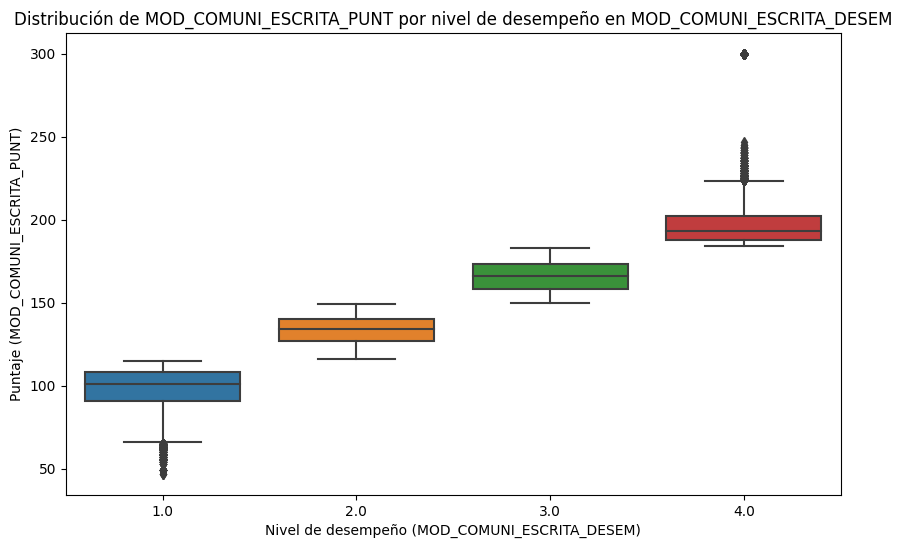


Promedio de MOD_COMUNI_ESCRITA_PUNT por cada nivel de desempeño:
MOD_COMUNI_ESCRITA_DESEM
1.0     98.756110
2.0    133.733437
3.0    165.867922
4.0    203.595299
Name: MOD_COMUNI_ESCRITA_PUNT, dtype: float64


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Eliminar los registros nulos en MOD_COMUNI_ESCRITA_PUNT
df_SaberPro = df_SaberPro.dropna(subset=['MOD_COMUNI_ESCRITA_PUNT'])

# Paso 2: Analizar los valores únicos de MOD_COMUNI_ESCRITA_DESEM
print("Valores únicos de MOD_COMUNI_ESCRITA_DESEM:")
print(df_SaberPro['MOD_COMUNI_ESCRITA_DESEM'].unique())

# Paso 3: Visualizar la relación entre MOD_COMUNI_ESCRITA_PUNT y MOD_COMUNI_ESCRITA_DESEM
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_SaberPro, x='MOD_COMUNI_ESCRITA_DESEM', y='MOD_COMUNI_ESCRITA_PUNT')
plt.title("Distribución de MOD_COMUNI_ESCRITA_PUNT por nivel de desempeño en MOD_COMUNI_ESCRITA_DESEM")
plt.xlabel("Nivel de desempeño (MOD_COMUNI_ESCRITA_DESEM)")
plt.ylabel("Puntaje (MOD_COMUNI_ESCRITA_PUNT)")
plt.show()

# Paso 4: Calcular el rango promedio de MOD_COMUNI_ESCRITA_PUNT para cada categoría de MOD_COMUNI_ESCRITA_DESEM
desempeno_promedio = df_SaberPro.groupby('MOD_COMUNI_ESCRITA_DESEM')['MOD_COMUNI_ESCRITA_PUNT'].mean()
print("\nPromedio de MOD_COMUNI_ESCRITA_PUNT por cada nivel de desempeño:")
print(desempeno_promedio)

La gráfica y los promedios indican que hay una relación clara y consistente entre el puntaje (MOD_COMUNI_ESCRITA_PUNT) y el nivel de desempeño (MOD_COMUNI_ESCRITA_DESEM). Los puntajes se agrupan en rangos que corresponden a cada nivel de desempeño, y los promedios aumentan de manera progresiva con cada categoría de MOD_COMUNI_ESCRITA_DESEM. Conclusión Dado que existe una correlación bien definida entre las dos variables, es razonable deducir los valores de MOD_COMUNI_ESCRITA_DESEM en función de MOD_COMUNI_ESCRITA_PUNT. Podrías asignar los valores nulos en MOD_COMUNI_ESCRITA_DESEM según los rangos o el promedio de MOD_COMUNI_ESCRITA_PUNT observados en cada nivel de desempeño:

Desempeño 1: MOD_COMUNI_ESCRITA_PUNT aproximadamente de 50 a 120. Desempeño 2: MOD_COMUNI_ESCRITA_PUNT de 120 a 150. Desempeño 3: MOD_COMUNI_ESCRITA_PUNT de 150 a 180. Desempeño 4: MOD_COMUNI_ESCRITA_PUNT de 180 en adelante.

In [55]:
# Hacer una copia explícita para evitar el SettingWithCopyWarning
df_SaberPro = df_SaberPro.copy()

# Definir función para imputar valores nulos en MOD_COMUNI_ESCRITA_DESEM
def imputar_desempeno(row):
    if pd.isna(row['MOD_COMUNI_ESCRITA_DESEM']):
        puntaje = row['MOD_COMUNI_ESCRITA_PUNT']
        if puntaje < 120:
            return 1.0
        elif 120 <= puntaje < 150:
            return 2.0
        elif 150 <= puntaje < 180:
            return 3.0
        elif puntaje >= 180:
            return 4.0
    return row['MOD_COMUNI_ESCRITA_DESEM']  # Si ya tiene valor, mantenerlo

# Aplicar la función a la columna 'MOD_COMUNI_ESCRITA_DESEM'
df_SaberPro['MOD_COMUNI_ESCRITA_DESEM'] = df_SaberPro.apply(imputar_desempeno, axis=1)

# Verificar el resultado
print("Conteo de valores únicos en MOD_COMUNI_ESCRITA_DESEM después de imputar:")
print(df_SaberPro['MOD_COMUNI_ESCRITA_DESEM'].value_counts(dropna=False))

Conteo de valores únicos en MOD_COMUNI_ESCRITA_DESEM después de imputar:
2.0    285448
3.0    199625
1.0    105578
4.0     62461
Name: MOD_COMUNI_ESCRITA_DESEM, dtype: int64


Finalmente, la variable FAMI_ESTRATOVIVIENDA tiene 47280 nulos. Dado que es una variable muy relevante es preferible no eliminar estos registros. La estrategia es utilizar la asignación aleatoria condicional, utilizando (por ejemplo) la educación del padre y de la madre, el municipio, si tiene computador y si tiene internet. Para ello se debe filtrar los registros con valores conocidos (registros que tienen valores no nulos en FAMI_ESTRATOVIVIENDA) para establecer las proporciones de cada estrato, condicionado a las variables socioeconómicas seleccionadas.

Calcular las Proporciones Condicionales: se calcula la probabilidad de cada estrato en función de las combinaciones de las variables condicionantes, como la educación de los padres, el municipio, y la tenencia de computador e internet.

Se asignan los valores faltantes: para cada registro con un valor nulo en FAMI_ESTRATOVIVIENDA, se asigna un estrato basado en las probabilidades calculadas en el paso anterior.

In [56]:
# Paso 1: Filtrar los registros con valores conocidos
df_known_estrato = df_SaberPro.dropna(subset=['FAMI_ESTRATOVIVIENDA'])
df_unknown_estrato = df_SaberPro[df_SaberPro['FAMI_ESTRATOVIVIENDA'].isna()]

# Paso 2: Calcular las proporciones condicionales en base a las variables socioeconómicas seleccionadas
variables_condicionantes = ['FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 
                            'ESTU_COD_RESIDE_MCPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET']

# Crear una tabla de proporciones condicionales
proporciones = df_known_estrato.groupby(variables_condicionantes)['FAMI_ESTRATOVIVIENDA'].value_counts(normalize=True).unstack()

# Paso 3: Función para asignar un valor de estrato basado en las proporciones condicionales
def imputar_estrato_condicional(grupo):
    # Obtener las probabilidades de cada estrato para el grupo actual
    try:
        probabilidades = proporciones.loc[(
            grupo['FAMI_EDUCACIONMADRE'], 
            grupo['FAMI_EDUCACIONPADRE'], 
            grupo['ESTU_COD_RESIDE_MCPIO'], 
            grupo['FAMI_TIENECOMPUTADOR'], 
            grupo['FAMI_TIENEINTERNET']
        )]
        # Imputar un valor basado en la distribución de probabilidad
        return np.random.choice(probabilidades.index, p=probabilidades.fillna(0))
    except KeyError:
        # Si no se encuentra la combinación en la tabla, imputar el valor más frecuente
        return df_known_estrato['FAMI_ESTRATOVIVIENDA'].mode()[0]

# Aplicar la imputación en los registros con valores nulos
df_unknown_estrato['FAMI_ESTRATOVIVIENDA'] = df_unknown_estrato.apply(imputar_estrato_condicional, axis=1)

# Combinar los registros conocidos e imputados en el DataFrame original
df_SaberPro_imputed = pd.concat([df_known_estrato, df_unknown_estrato], ignore_index=True)

# Verificar la distribución final
print("Distribución de FAMI_ESTRATOVIVIENDA después de la imputación:")
print(df_SaberPro_imputed['FAMI_ESTRATOVIVIENDA'].value_counts())

Distribución de FAMI_ESTRATOVIVIENDA después de la imputación:
Estrato 2      230246
Estrato 3      206707
Estrato 1      111683
Estrato 4       64758
Estrato 5       23724
Estrato 6       12896
Sin Estrato      3098
Name: FAMI_ESTRATOVIVIENDA, dtype: int64


In [57]:
# Verificar si hay valores nulos en el DataFrame
if df_SaberPro_imputed.isnull().sum().sum() == 0:
    print("No hay registros nulos en el DataFrame.")
else:
    # Mostrar el número de nulos por columna en caso de que haya alguno
    print("Existen valores nulos en las siguientes columnas:")
    print(df_SaberPro_imputed.isnull().sum()[df_SaberPro_imputed.isnull().sum() > 0])

No hay registros nulos en el DataFrame.


In [58]:
print("Resumen de tipos de datos y valores nulos en Saber11:")
print(df_Saber11.info())
print("\nResumen de tipos de datos y valores nulos en SaberPro:")
print(df_SaberPro.info())

Resumen de tipos de datos y valores nulos en Saber11:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 502870 entries, 1 to 927975
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   COLE_AREA_UBICACION            502870 non-null  object 
 1   COLE_BILINGUE                  502870 non-null  object 
 2   COLE_CALENDARIO                502870 non-null  object 
 3   COLE_COD_DANE_ESTABLECIMIENTO  502870 non-null  float64
 4   COLE_COD_DANE_SEDE             502870 non-null  float64
 5   COLE_COD_DEPTO_UBICACION       502870 non-null  float64
 6   COLE_COD_MCPIO_UBICACION       502870 non-null  float64
 7   COLE_CODIGO_ICFES              502870 non-null  float64
 8   COLE_DEPTO_UBICACION           502870 non-null  object 
 9   COLE_GENERO                    502870 non-null  object 
 10  COLE_JORNADA                   502870 non-null  object 
 11  COLE_MCPIO_UBICACION           502870

In [62]:
# Conversión para columnas de Saber 11

# Convertir columnas de códigos de ubicación e instituciones a tipo 'object'
columnas_para_convertir = [
    'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE', 
    'COLE_COD_DEPTO_UBICACION', 'COLE_COD_MCPIO_UBICACION',
    'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_COD_MCPIO_PRESENTACION',
    'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO',
    'COLE_CODIGO_ICFES'
]

# Convertir columnas a tipo str y verificar que cada entrada sea str
for columna in columnas_para_convertir:
    # Convertir a str explícitamente
    df_Saber11[columna] = df_Saber11[columna].astype(str)
    # Verificar que todos los elementos de la columna sean de tipo str
    if not all(isinstance(val, str) for val in df_Saber11[columna].dropna()):
        print(f"Error: La columna '{columna}' contiene valores que no son de tipo str.")
    else:
        print(f"Éxito: La columna '{columna}' contiene solo valores de tipo str.")

Éxito: La columna 'COLE_COD_DANE_ESTABLECIMIENTO' contiene solo valores de tipo str.
Éxito: La columna 'COLE_COD_DANE_SEDE' contiene solo valores de tipo str.
Éxito: La columna 'COLE_COD_DEPTO_UBICACION' contiene solo valores de tipo str.
Éxito: La columna 'COLE_COD_MCPIO_UBICACION' contiene solo valores de tipo str.
Éxito: La columna 'ESTU_COD_DEPTO_PRESENTACION' contiene solo valores de tipo str.
Éxito: La columna 'ESTU_COD_MCPIO_PRESENTACION' contiene solo valores de tipo str.
Éxito: La columna 'ESTU_COD_RESIDE_DEPTO' contiene solo valores de tipo str.
Éxito: La columna 'ESTU_COD_RESIDE_MCPIO' contiene solo valores de tipo str.
Éxito: La columna 'COLE_CODIGO_ICFES' contiene solo valores de tipo str.


In [64]:
# Conversión para columnas de Saber Pro

# Convertir columnas de códigos de ubicación e instituciones a tipo 'object'
columnas_para_convertir_pro = [
    'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_COD_COLE_MCPIO_TERMINO',
    'ESTU_COD_DEPTO_PRESENTACION', 'ESTU_COD_MCPIO_PRESENTACION', 
    'ESTU_INST_CODMUNICIPIO', 'ESTU_PRGM_CODMUNICIPIO',
    'INST_COD_INSTITUCION', 'ESTU_SNIES_PRGMACADEMICO',
]
# Convertir columnas a tipo str y verificar que cada entrada sea str
for columna in columnas_para_convertir_pro:
    # Convertir a str explícitamente
    df_SaberPro_imputed[columna] = df_SaberPro_imputed[columna].astype(str)
    # Verificar que todos los elementos de la columna sean de tipo str
    if not all(isinstance(val, str) for val in df_SaberPro_imputed[columna].dropna()):
        print(f"Error: La columna '{columna}' contiene valores que no son de tipo str.")
    else:
        print(f"Éxito: La columna '{columna}' contiene solo valores de tipo str.")

Éxito: La columna 'ESTU_COD_RESIDE_DEPTO' contiene solo valores de tipo str.
Éxito: La columna 'ESTU_COD_RESIDE_MCPIO' contiene solo valores de tipo str.
Éxito: La columna 'ESTU_COD_COLE_MCPIO_TERMINO' contiene solo valores de tipo str.
Éxito: La columna 'ESTU_COD_DEPTO_PRESENTACION' contiene solo valores de tipo str.
Éxito: La columna 'ESTU_COD_MCPIO_PRESENTACION' contiene solo valores de tipo str.
Éxito: La columna 'ESTU_INST_CODMUNICIPIO' contiene solo valores de tipo str.
Éxito: La columna 'ESTU_PRGM_CODMUNICIPIO' contiene solo valores de tipo str.
Éxito: La columna 'INST_COD_INSTITUCION' contiene solo valores de tipo str.
Éxito: La columna 'ESTU_SNIES_PRGMACADEMICO' contiene solo valores de tipo str.


In [71]:
# Variables categóricas en Saber 11
for columna in df_Saber11.select_dtypes(include='object').columns:
    print(f"Frecuencia de valores en '{columna}' (Saber 11):")
    print(df_Saber11[columna].value_counts())
    print("\n")

# Variables categóricas en Saber Pro
for columna in df_SaberPro.select_dtypes(include='object').columns:
    print(f"Frecuencia de valores en '{columna}' (Saber Pro):")
    print(df_SaberPro_imputed[columna].value_counts())
    print("\n")

Frecuencia de valores en 'COLE_AREA_UBICACION' (Saber 11):
URBANO    429311
RURAL      73559
Name: COLE_AREA_UBICACION, dtype: int64


Frecuencia de valores en 'COLE_BILINGUE' (Saber 11):
N                  425406
No especificado     68419
S                    9045
Name: COLE_BILINGUE, dtype: int64


Frecuencia de valores en 'COLE_CALENDARIO' (Saber 11):
A       484187
B        15885
OTRO      2798
Name: COLE_CALENDARIO, dtype: int64


Frecuencia de valores en 'COLE_COD_DANE_ESTABLECIMIENTO' (Saber 11):
105001000108.0    844
105001013340.0    674
311001105863.0    551
176001005813.0    512
111001024732.0    504
                 ... 
376109011720.0      1
373873000849.0      1
373268001787.0      1
268190000292.0      1
376520007393.0      1
Name: COLE_COD_DANE_ESTABLECIMIENTO, Length: 11049, dtype: int64


Frecuencia de valores en 'COLE_COD_DANE_SEDE' (Saber 11):
105001000108.0    844
105001013340.0    674
311001105863.0    551
176001005813.0    512
111001024732.0    504
              

Comentarios sobre la Distribución de Variables Categóricas

Variables con solo un valor o alta concentración en una categoría:

ESTU_ESTUDIANTE en Saber 11, ESTU_NACIONALIDAD y ESTU_PAIS_RESIDE solo tienen un valor, por lo que se van a aliminar.

Variables con frecuencias muy desbalanceadas:

COLE_BILINGUE en Saber 11 tiene una gran concentración de "No", lo cual es natural en Colombia.

INST_ORIGEN en Saber Pro muestra mayor proporción de "NO OFICIAL - CORPORACIÓN" y "NO OFICIAL - FUNDACIÓN". Los registros de CORPORACIÓN Y DE FUNDACIÓN se pueden unir en una sola categoría "NO OFICIAL".

Inconsistencias en los nombres de municipios y departamentos:

Algunos municipios como BOGOTÁ aparecen en mayúsculas y otros en minúsculas, como en COLE_MCPIO_UBICACION. Esto podría unificarse para evitar duplicación de categorías y errores en el análisis. Hay que revisar las inconsistencias en nombres también en Saber 11 y en Saber Pro para mantener la uniformidad en las variables relacionadas con la ubicación.

Variables categóricas extensas:

Algunas categorías, como COLE_COD_DANE_ESTABLECIMIENTO y ESTU_PRGM_ACADEMICO, tienen una gran cantidad de valores únicos, lo cual puede complicar el análisis. Se puede considerar agrupar ciertos códigos o especializaciones si resultan muy específicos y con pocas observaciones.

Para reducir la dimensionalidad, se puede agrupar estas categorías por criterios específicos, como ubicación geográfica o campo académico.

Distribuciones inusuales en variables socioeconómicas:

FAMI_ESTRATOVIVIENDA y FAMI_EDUCACIONPADRE/MADRE muestran que las categorías están bien representadas, lo que es ideal para análisis, especialmente para estratos socioeconómicos.

Ajuste en valores Si y No en características del hogar:

FAMI_TIENEAUTOMOVIL, FAMI_TIENECOMPUTADOR, FAMI_TIENEINTERNET, y FAMI_TIENELAVADORA están balanceadas. Contar con un balance en estas variables mejora la calidad del análisis y del modelado, y permite un enfoque justo en cada categoría y una mayor representatividad en los resultados.

In [72]:
# Estadísticas descriptivas de variables numéricas
print("Estadísticas descriptivas - Saber 11:")
print(df_Saber11.describe())

print("\nEstadísticas descriptivas - Saber Pro:")
print(df_SaberPro_imputed.describe())

Estadísticas descriptivas - Saber 11:
       FAMI_CUARTOSHOGAR  FAMI_PERSONASHOGAR    PUNT_INGLES  PUNT_MATEMATICAS  \
count      502870.000000       502870.000000  502870.000000     502870.000000   
mean            2.829161            4.798367      50.658930         51.026452   
std             1.016737            1.682187      12.213322         11.800000   
min             1.000000            1.000000       0.000000          0.000000   
25%             2.000000            4.000000      43.000000         43.000000   
50%             3.000000            4.000000      49.000000         50.000000   
75%             3.000000            6.000000      57.000000         59.000000   
max            10.000000           12.000000     100.000000        100.000000   

       PUNT_SOCIALES_CIUDADANAS  PUNT_C_NATURALES  PUNT_LECTURA_CRITICA  \
count             502870.000000     502870.000000         502870.000000   
mean                  49.439006         50.709859             52.159512   
std    

In [67]:
# Columnas de puntajes
puntaje_columnas_saber11 = ['PUNT_INGLES', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']
puntaje_columnas_saberpro = ['MOD_RAZONA_CUANTITAT_PUNT', 'MOD_COMUNI_ESCRITA_PUNT', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_INGLES_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT']

In [73]:
# Convertir las columnas de puntajes a tipo numérico (por un error que se obtuvo al graficar, nos dimos cuenta que 
# había que hacer la conversión de las columnas de puntajes a numéricas)

# Convertir columnas de puntajes en Saber11 a numéricas
for columna in puntaje_columnas_saber11:
    df_Saber11[columna] = pd.to_numeric(df_Saber11[columna], errors='coerce')

# Convertir columnas de puntajes en SaberPro a numéricas
for columna in puntaje_columnas_saberpro:
    df_SaberPro_imputed[columna] = pd.to_numeric(df_SaberPro_imputed[columna], errors='coerce')

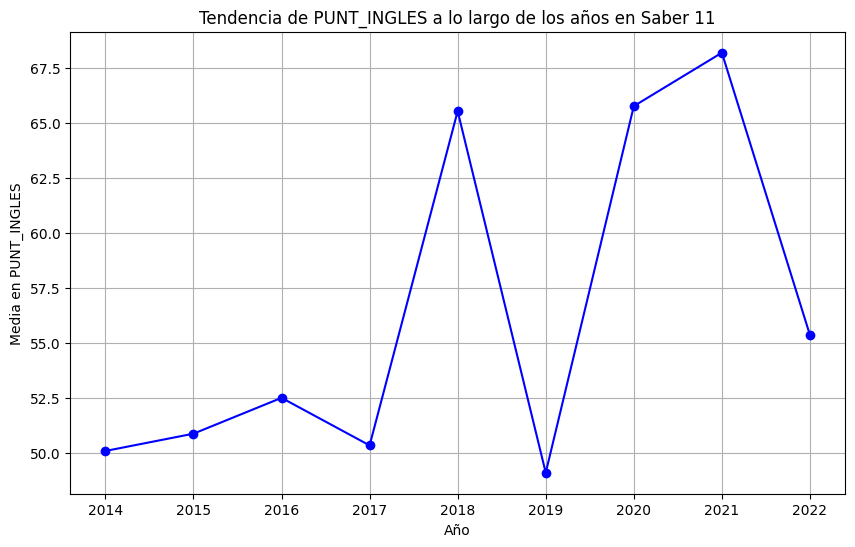

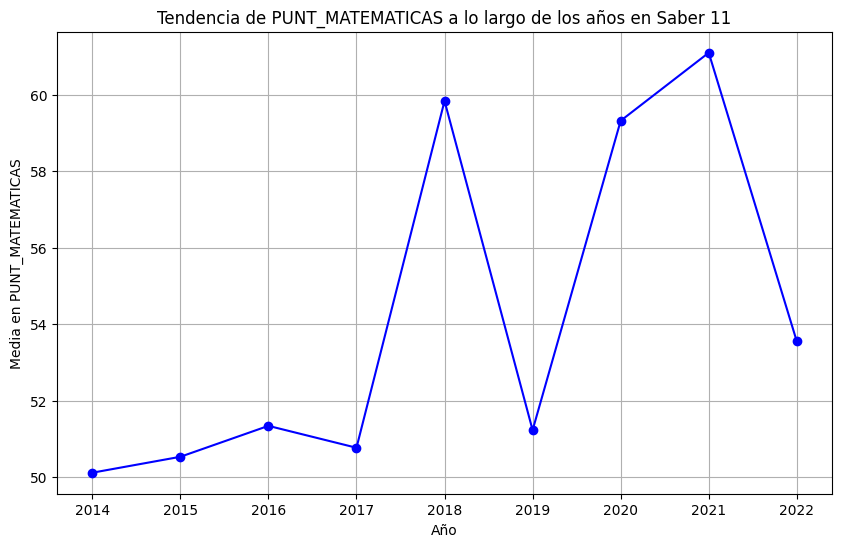

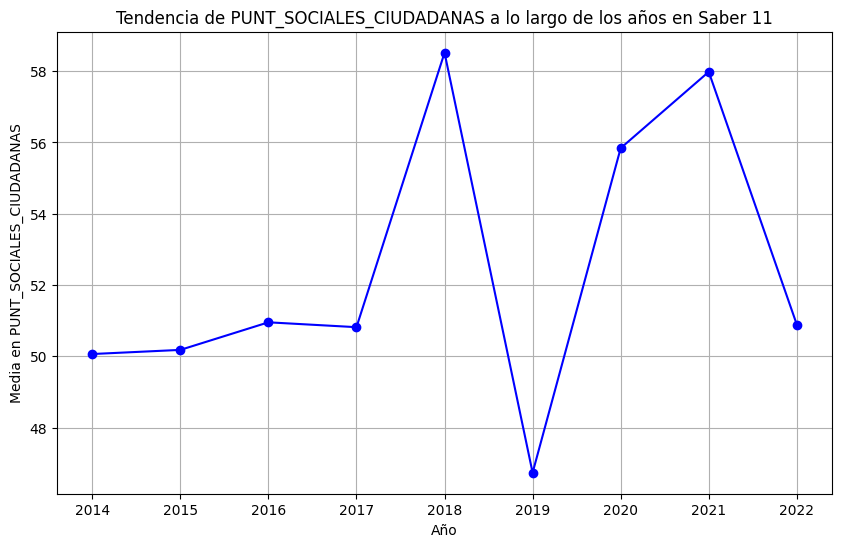

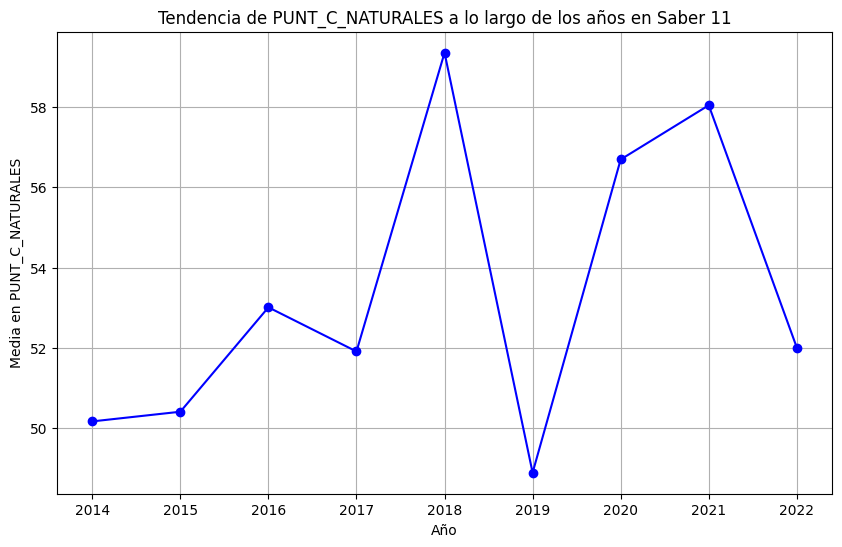

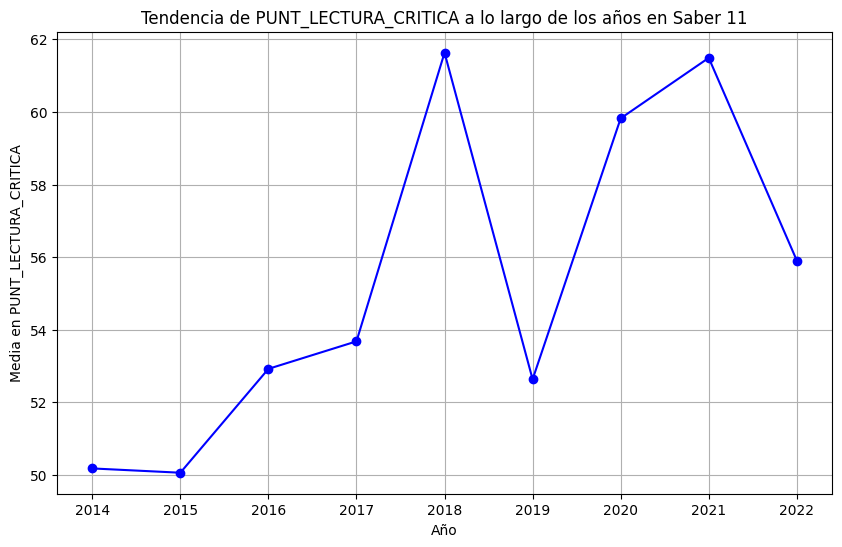

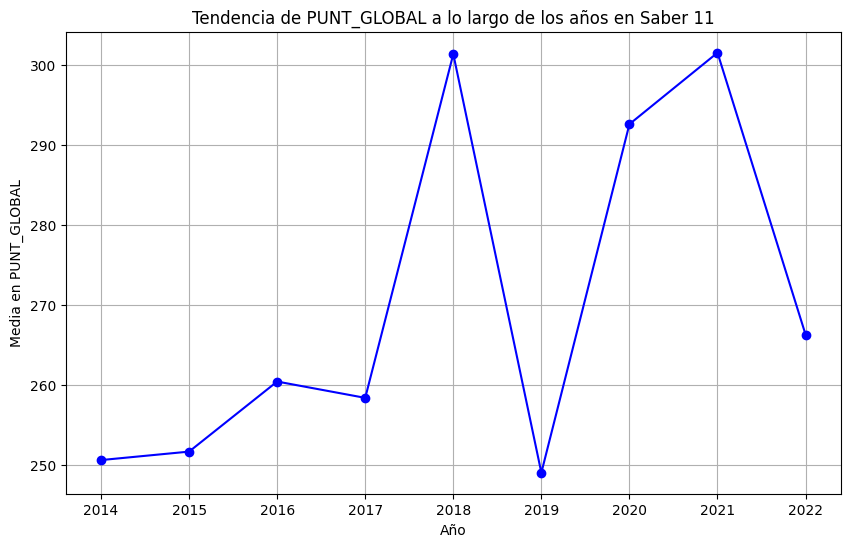

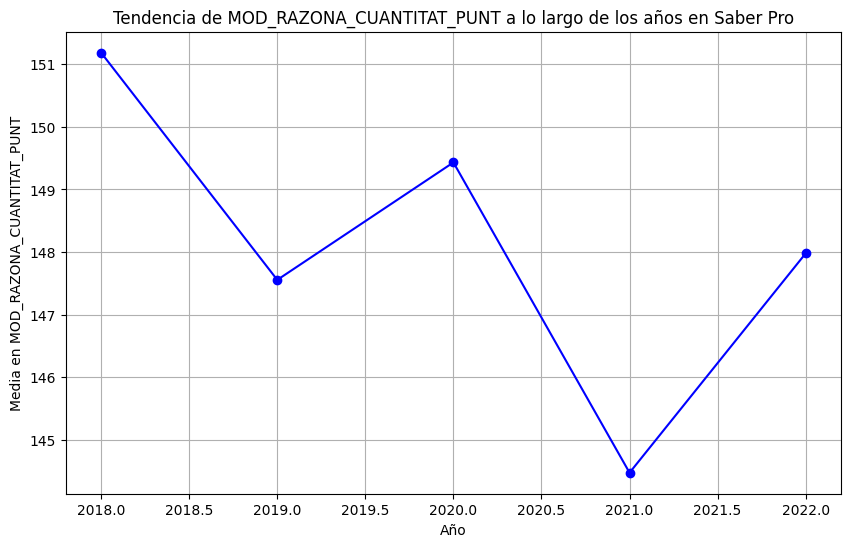

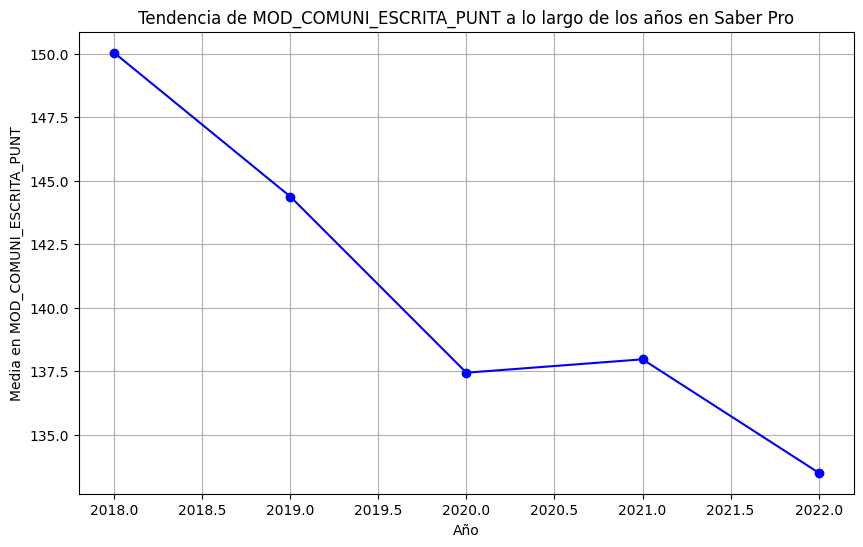

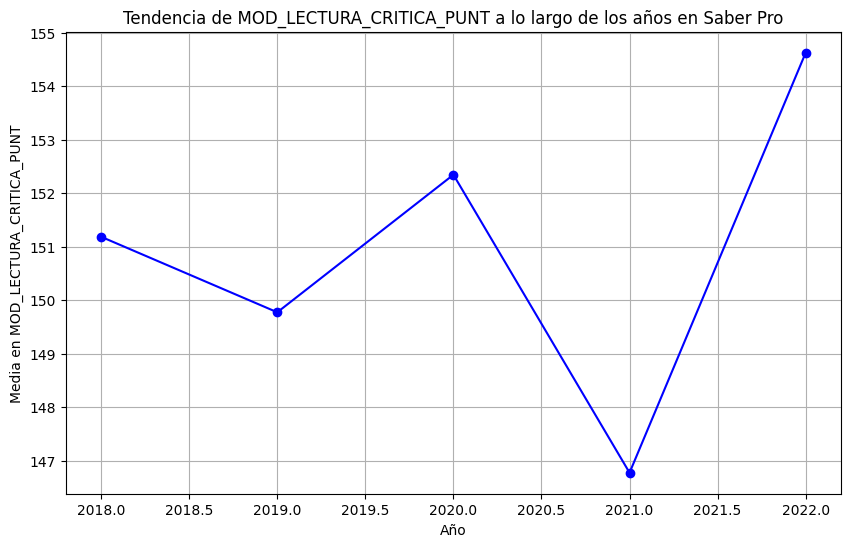

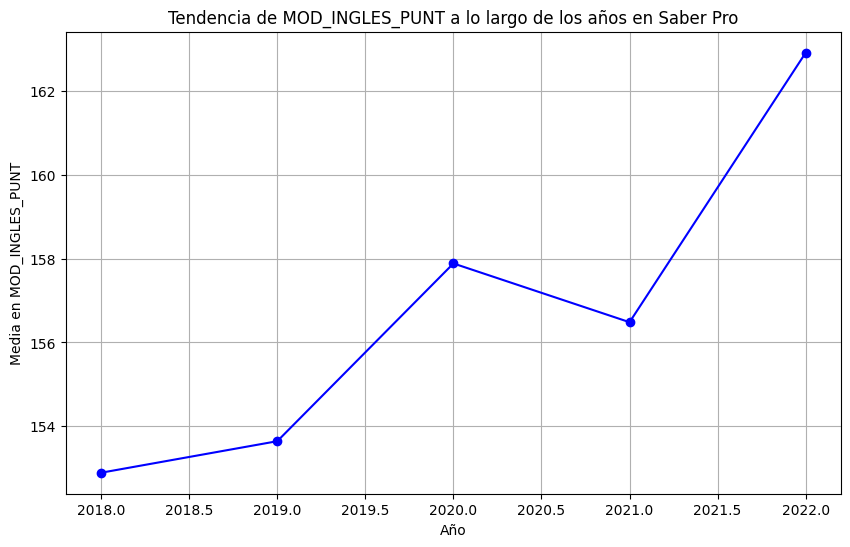

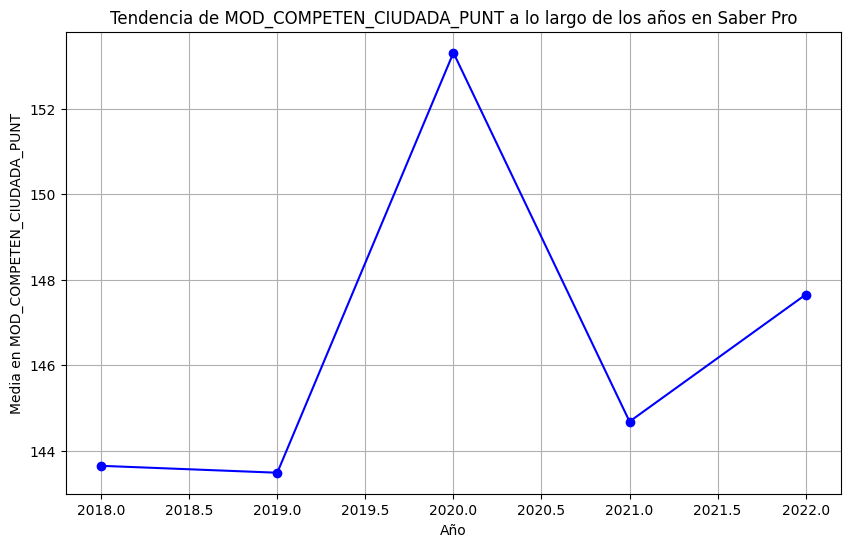

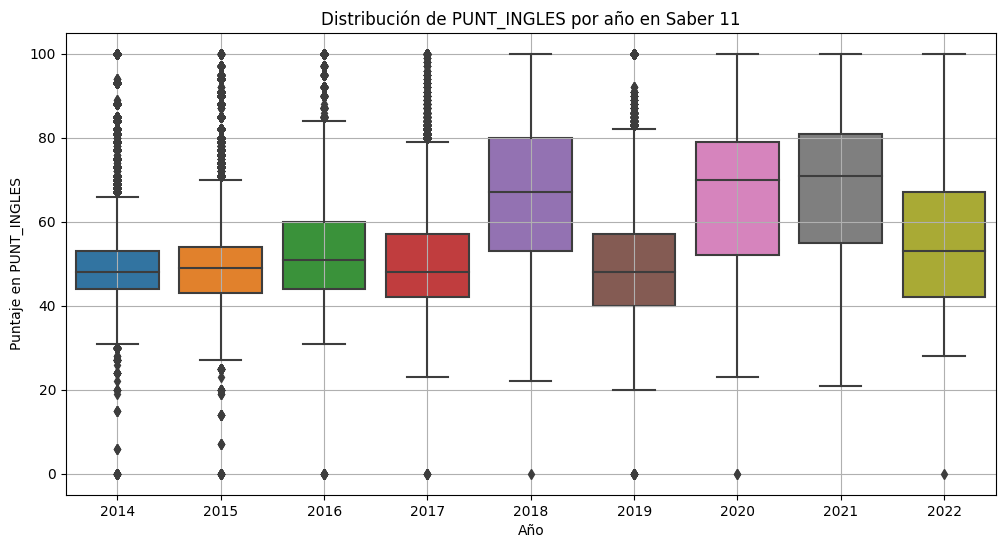

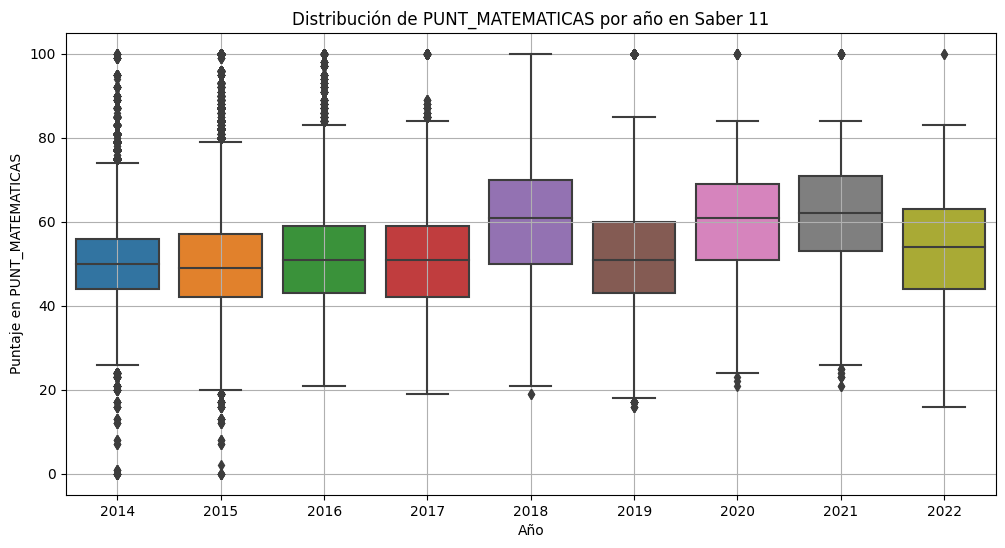

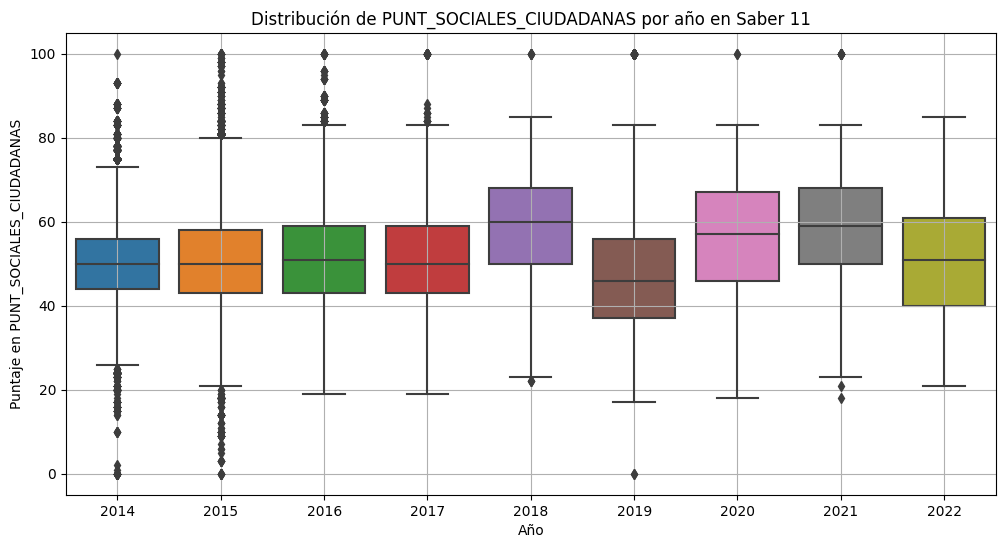

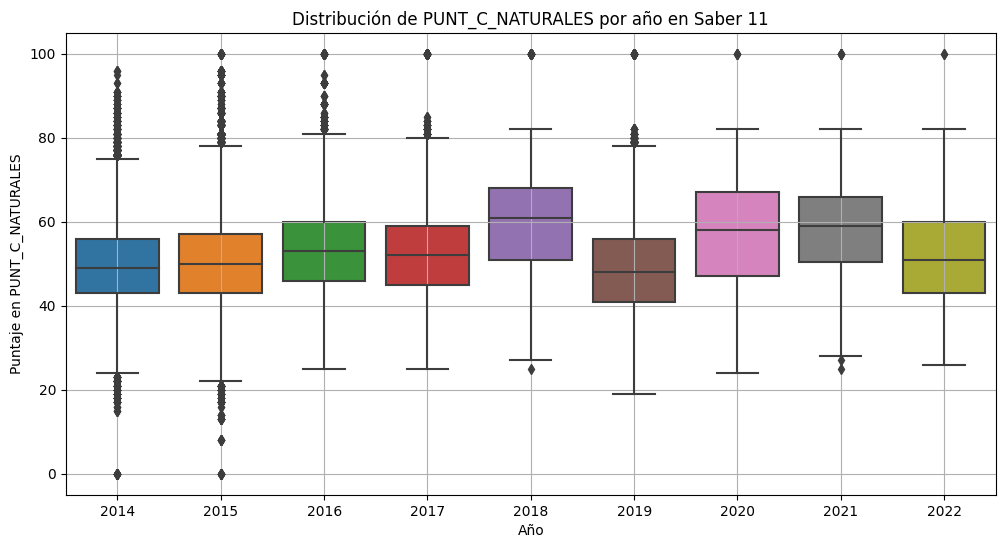

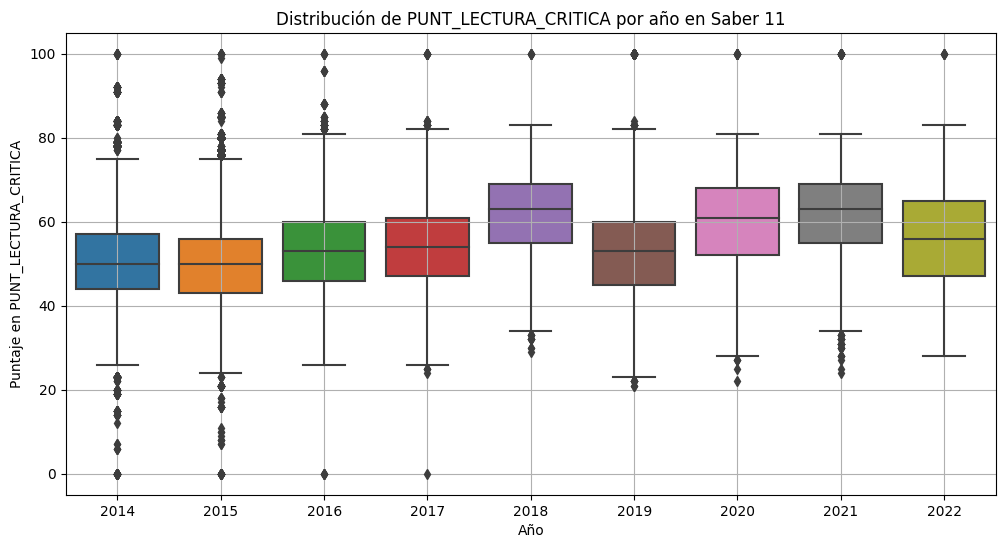

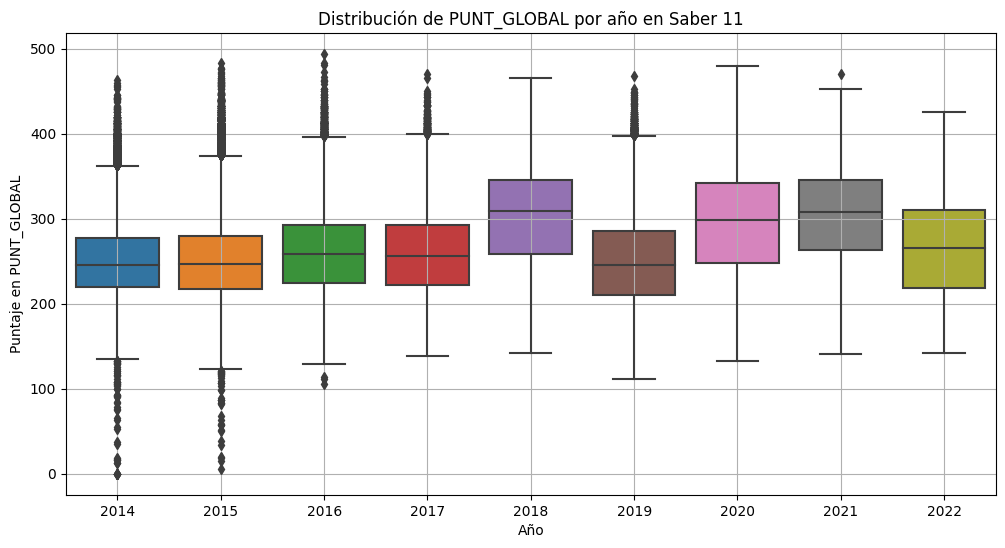

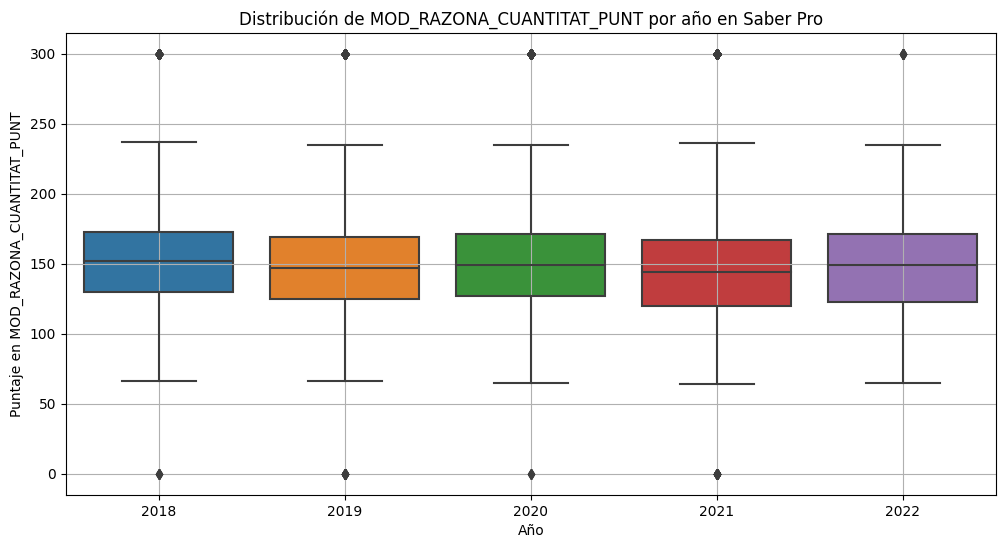

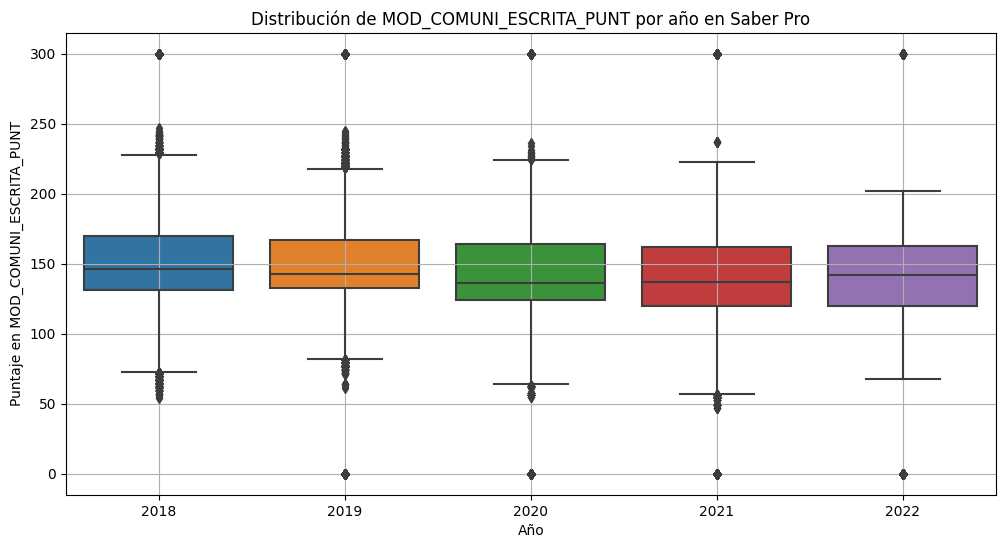

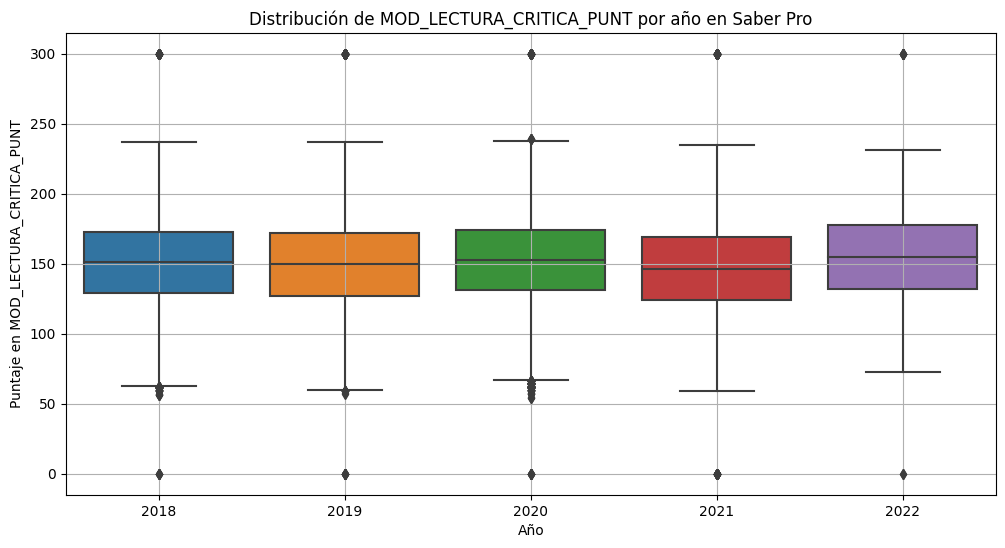

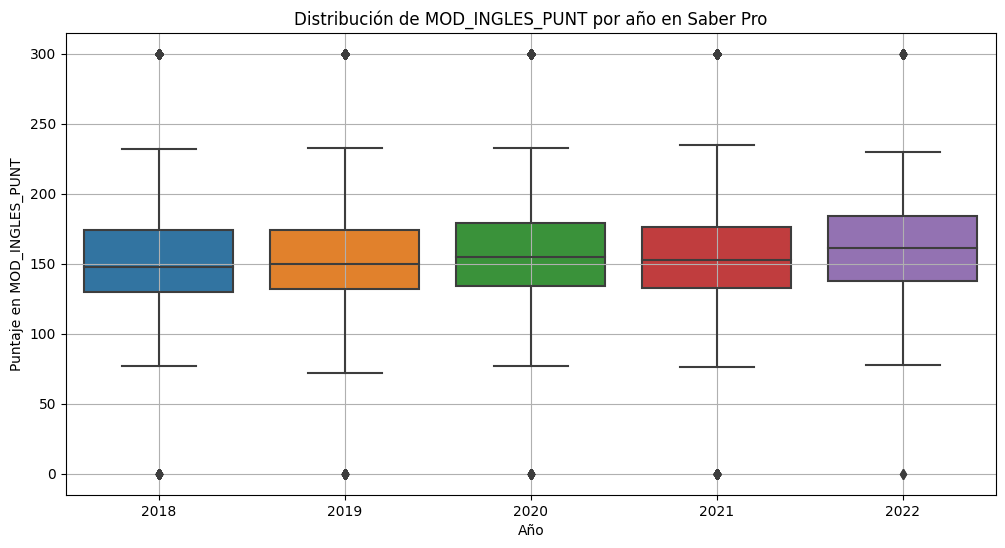

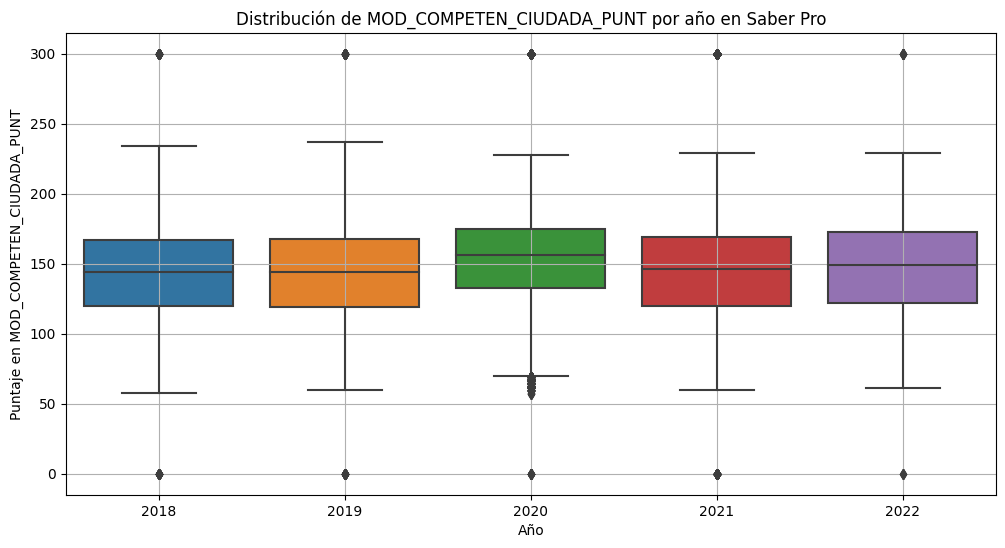

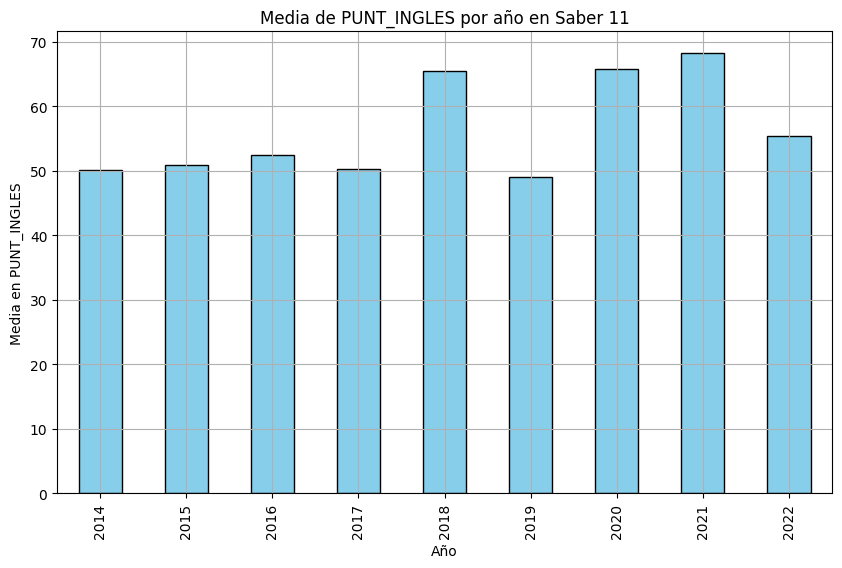

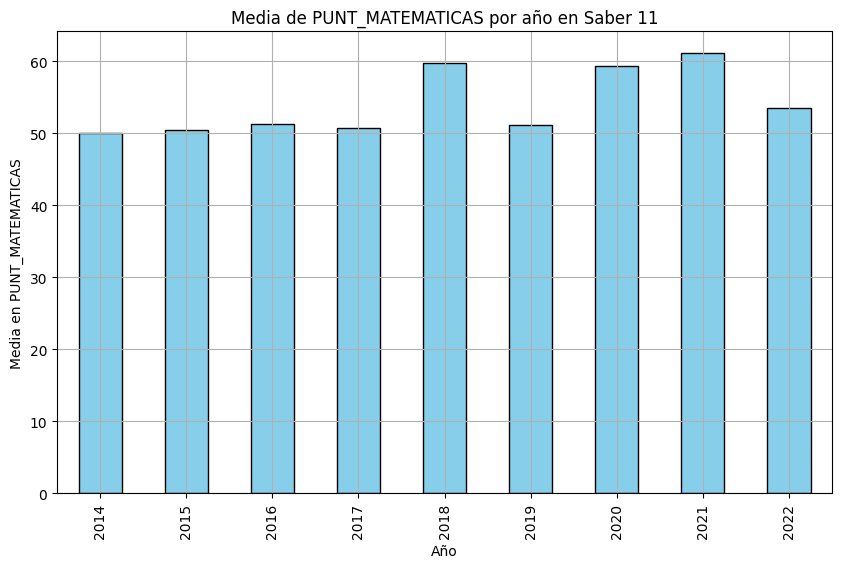

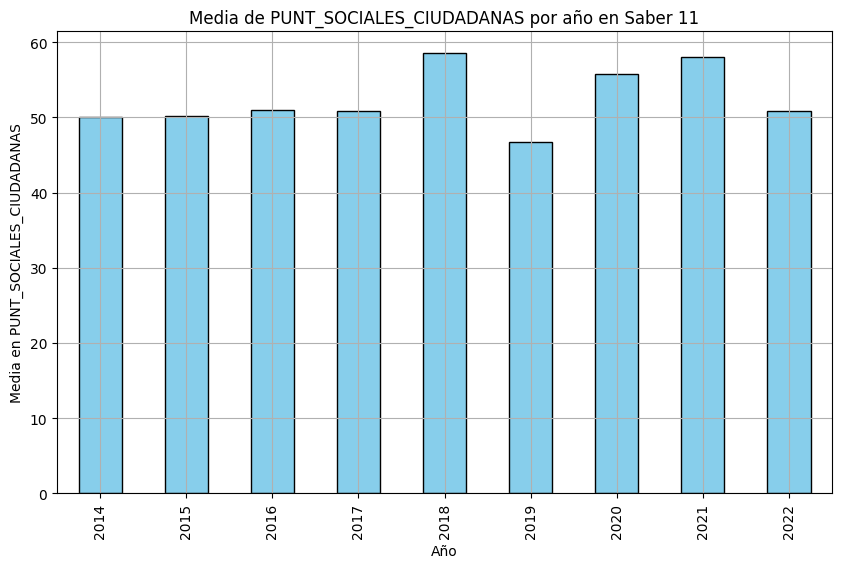

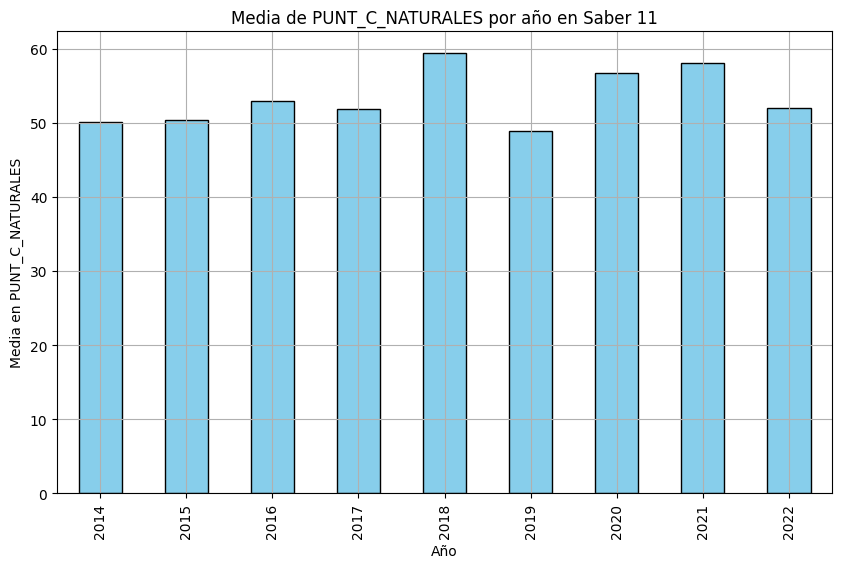

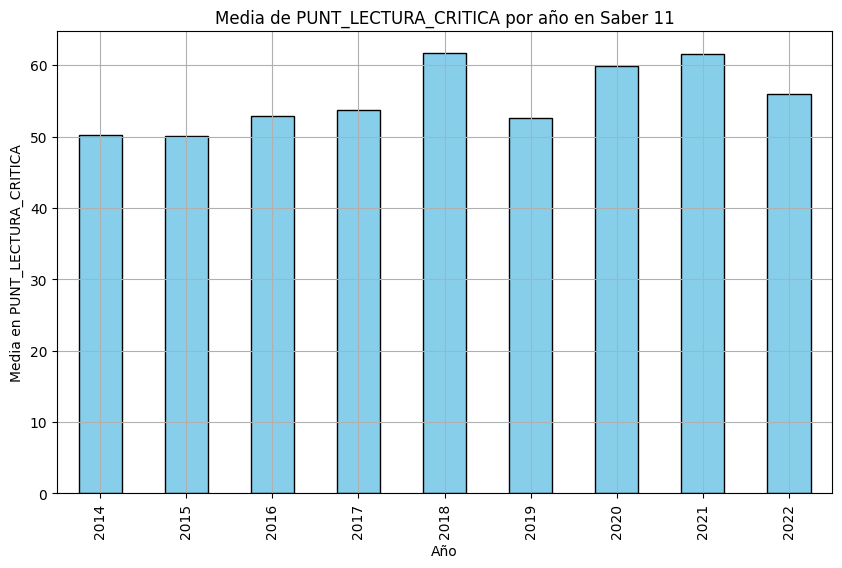

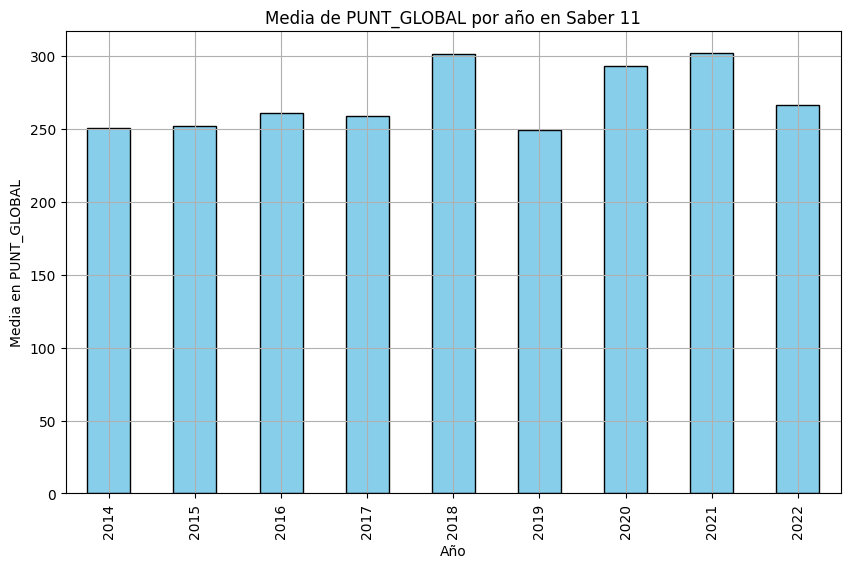

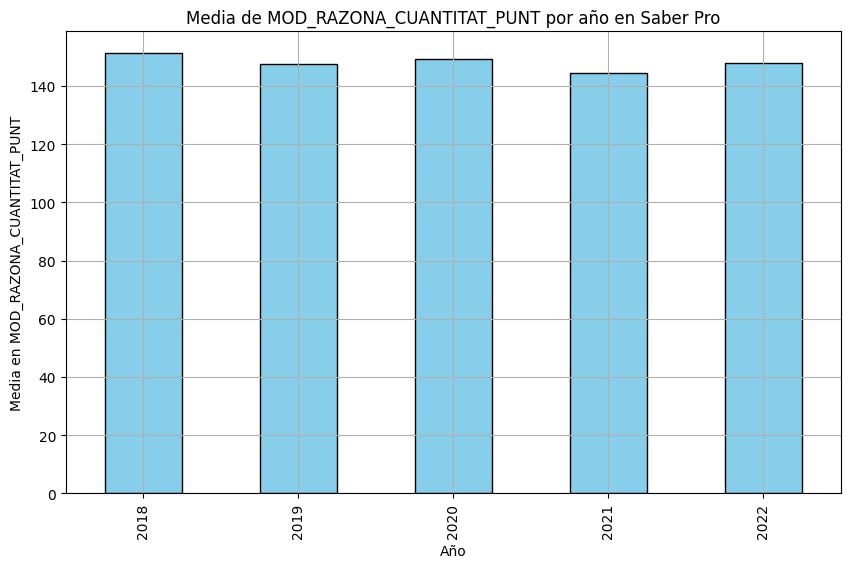

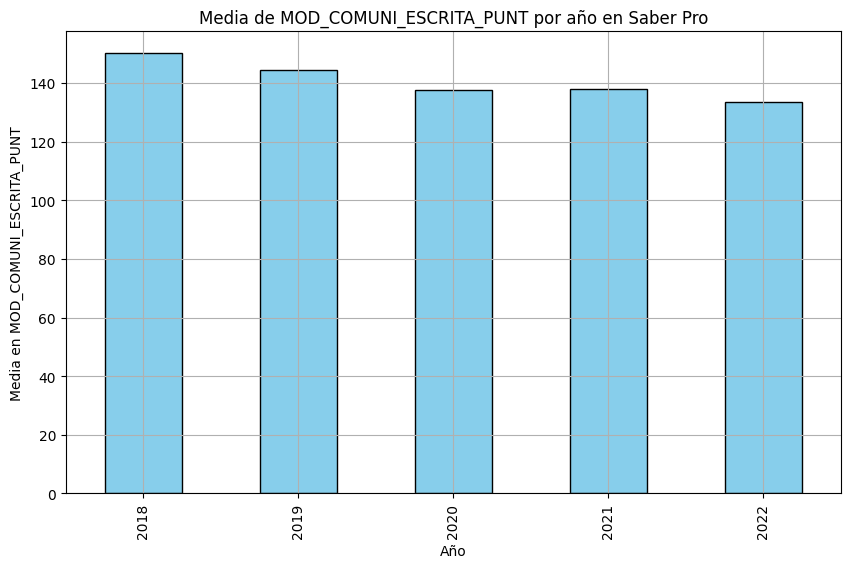

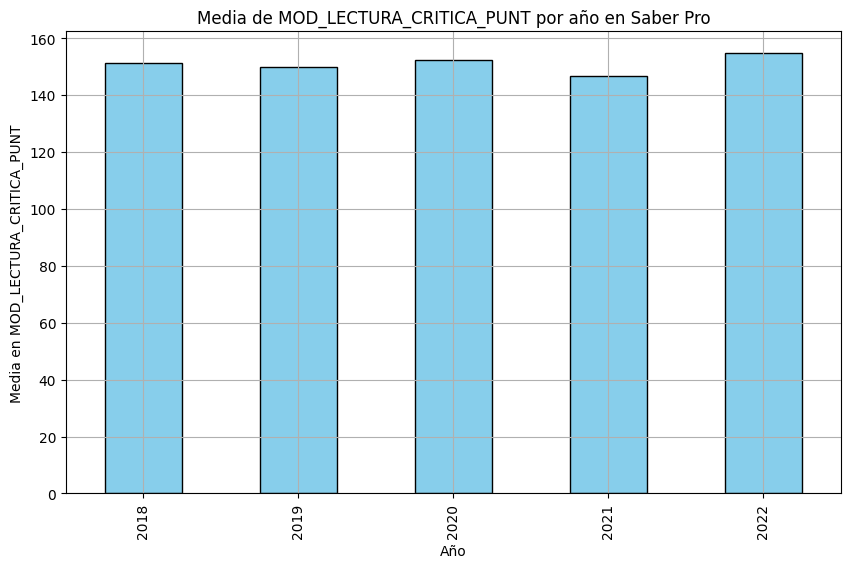

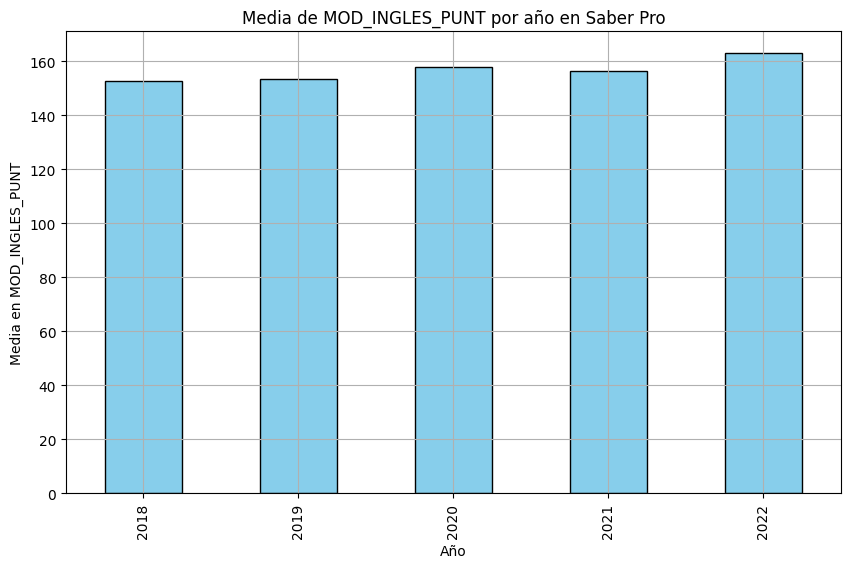

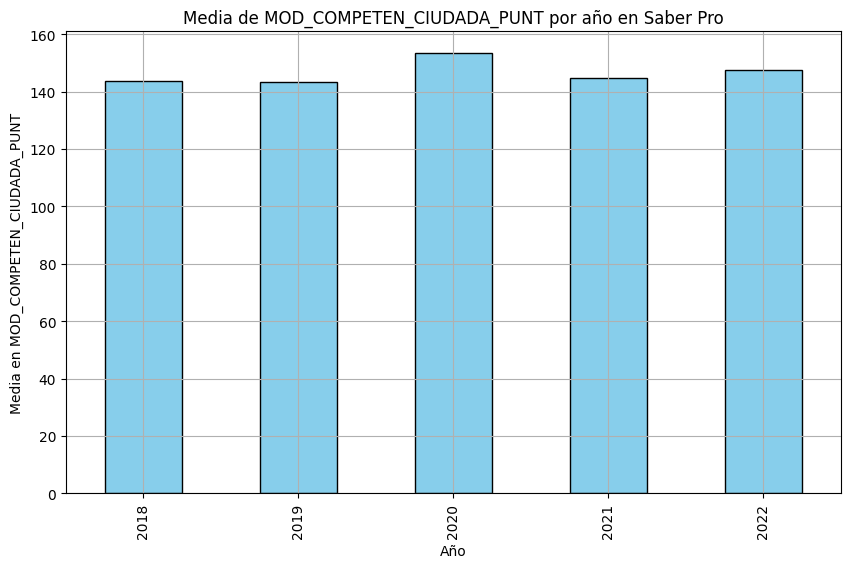

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar líneas de tendencia
def graficar_lineas_tendencia(df, puntaje_columnas, titulo_base):
    for columna in puntaje_columnas:
        plt.figure(figsize=(10, 6))
        data = df.groupby('AÑO')[columna].mean()
        plt.plot(data.index, data.values, marker='o', linestyle='-', color='b')
        plt.title(f"Tendencia de {columna} a lo largo de los años en {titulo_base}")
        plt.xlabel("Año")
        plt.ylabel(f"Media en {columna}")
        plt.grid(True)
        plt.show()

# Generar gráficas de tendencia con la media de puntajes por año
graficar_lineas_tendencia(df_Saber11, puntaje_columnas_saber11, "Saber 11")
graficar_lineas_tendencia(df_SaberPro, puntaje_columnas_saberpro, "Saber Pro")

# Función para graficar boxplots por año
def graficar_boxplots_por_año(df, puntaje_columnas, titulo_base):
    for columna in puntaje_columnas:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='AÑO', y=columna)
        plt.title(f"Distribución de {columna} por año en {titulo_base}")
        plt.xlabel("Año")
        plt.ylabel(f"Puntaje en {columna}")
        plt.grid(True)
        plt.show()

# Generar gráficas de cajas por año
graficar_boxplots_por_año(df_Saber11, puntaje_columnas_saber11, "Saber 11")
graficar_boxplots_por_año(df_SaberPro, puntaje_columnas_saberpro, "Saber Pro")

# Función para graficar barras de la media por año
def graficar_barras_media_por_año(df, puntaje_columnas, titulo_base):
    for columna in puntaje_columnas:
        plt.figure(figsize=(10, 6))
        data = df.groupby('AÑO')[columna].mean()
        data.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f"Media de {columna} por año en {titulo_base}")
        plt.xlabel("Año")
        plt.ylabel(f"Media en {columna}")
        plt.grid(True)
        plt.show()

# Generar gráficas de barras de la media de puntajes por año
graficar_barras_media_por_año(df_Saber11, puntaje_columnas_saber11, "Saber 11")
graficar_barras_media_por_año(df_SaberPro, puntaje_columnas_saberpro, "Saber Pro")


In [78]:
# Generar resumen estadístico para las columnas de puntajes en Saber 11
resumen_saber11 = df_Saber11[puntaje_columnas_saber11].describe(percentiles=[0.25, 0.5, 0.75])
print("Resumen Estadístico de Puntajes en Saber 11")
print(resumen_saber11)

# Generar resumen estadístico para las columnas de puntajes en Saber Pro
resumen_saberpro = df_SaberPro[puntaje_columnas_saberpro].describe(percentiles=[0.25, 0.5, 0.75])
print("\nResumen Estadístico de Puntajes en Saber Pro")
print(resumen_saberpro)

Resumen Estadístico de Puntajes en Saber 11
         PUNT_INGLES  PUNT_MATEMATICAS  PUNT_SOCIALES_CIUDADANAS  \
count  502870.000000     502870.000000             502870.000000   
mean       50.658930         51.026452                 49.439006   
std        12.213322         11.800000                 11.564722   
min         0.000000          0.000000                  0.000000   
25%        43.000000         43.000000                 41.000000   
50%        49.000000         50.000000                 49.000000   
75%        57.000000         59.000000                 58.000000   
max       100.000000        100.000000                100.000000   

       PUNT_C_NATURALES  PUNT_LECTURA_CRITICA    PUNT_GLOBAL  
count     502870.000000         502870.000000  502870.000000  
mean          50.709859             52.159512     254.100849  
std           10.463244             10.152384      49.358149  
min            0.000000              0.000000       0.000000  
25%           43.000000     

In [74]:
df_SaberPro_imputed.columns

Index(['ESTU_PAIS_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'ESTU_MCPIO_RESIDE',
       'ESTU_CODDANE_COLE_TERMINO', 'ESTU_COD_COLE_MCPIO_TERMINO',
       'ESTU_COD_DEPTO_PRESENTACION', 'INST_COD_INSTITUCION',
       'INST_CARACTER_ACADEMICO', 'ESTU_NUCLEO_PREGRADO',
       'ESTU_INST_DEPARTAMENTO', 'ESTU_INST_CODMUNICIPIO',
       'ESTU_INST_MUNICIPIO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO',
       'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_METODO_PRGM',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_DEPTO_PRESENTACION',
       'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION',
       'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO',
       'ESTU_HORASSEMANATRABAJA', 'ESTU_SNIES_PRGMACADEMICO',
       'ESTU_PRIVADO_LIBERTAD', 'ESTU_NACIONALIDAD', 'ESTU_ESTUDIANTE',
       'ESTU_GENERO', 'ESTU_COLE_TERMINO', 'ESTU_PAGOMATRICULAPADRES',
       'ESTU_PAGOMATRICULAPROPIO', 'F